DMHR - CHMEGH37.ipynb, candidate number: WMRY4 <br>

# Assignment A


The NHS has been challenged to make “efficiency savings” and you have been commissioned by an NHS executive to review, document and assess GP prescribing costs. Using data from the HSCIC GP Practice Prescribing dataset for your assigned city (Luton) only, address the following queries using a combination of narrative, tables, figures and descriptive statistcs: <br>

** 1. Identify all GP practices and produce a table with the total number of prescriptions and their total actual cost (using the ACT COST column). ** <br>
Fortythree GP practices were identified in Luton [A.2.1]. The full table containing number of prescriptions and total cost per GP practice in this city can be found in table 1 [A.3]. 

Notice that the information in the GP demographic information dataset was not always in the right label/column although some data cleaning was done before merging datasets [A.1.2 & A.1.4]. So, for the Luton case, either the information contained in the town or the shire was used to find the total number of surgeries. By excluding the shire in the query, five GP surgeries (e81025, e81032, e81076, e81639 and y00729) would have been undetected as can be seen in A.2.1. However, the combination of an “or” logical operation and a keyword as string (“luton”) may not necessarily work well for the rest of towns/cities due to some shires that may be partly associated with the name of the city of interest but also contain other cities. That is the case of Cambridgeshire, which contains the City of Cambridge and other cities including Peterborough. Getting table 1 was fairly a straight forward process once GP surgeries in Luton were identified.

** 2. Find the top ten most/least frequently prescribed medications across all practices. What is their total actual cost and how does that compare to the overall actual costs of each practice and of the entire city? ** <br>
Prescribing information was grouped by BNF code and, simultaneously, counted up in order to get the frequencies. Then, a rank was created. Table 2 [A.4.1] and table 3 [A.4.2] show the most and least frequently prescribed medications in Luton in December 2015. 

On the top ten, there were medications to stop acid secretion, lower cholesterol, treat high blood pressure and coronary artery disease, treat or prevent bronchospasm, relief pain and to fight bacteria (only one antibiotic made it for the top ten).
It was interesting to find out that aspirins and paracetamol were in the fifth and seventh position respectively. Although, they are part of some regular medical treatments (eg. to prevent myocardial infarction) these may be cheaper to buy over the counter.

In terms of the top ten least frequent prescribed medications, the list was just too spread as there were roughly 1,500 different medications prescribed only once during December 2015. So, in terms of least frequent, all of them had the same ranking position (5065th ), but the strategy was to sorted them out in descending order by cost, which showed the last ten medications. On the least frequent list, there were products such as irrigation solution, vitamin supplements, omega-3 fatty acids, among others.

For December 2015, the total cost of the top ten most prescribed medications was £92,068.08 (median= £6,609.85, IQR= £7,546.00) which represented roughly a 3.0% of the total prescribed medications cost of the entire Luton (calculations are in [A.4.3.1]). A full table (table 4) with practices, top ten and overall city costs are listed in [A.4.3.3] and a visualisation (excluding overall city cost) can be found in fig. 1 [A.4.3.4]. It is worth noting that the cost of the top ten most prescribed medication exceeds the total cost of 31 out of the 43 GP surgeries in Luton as can be seen in fig 1.

** 3. Find the top ten most expensive medications and calculate their total actual cost. ** <br>
As shown in table 5 [A.5.1], the most expensive medications (mean= £609, sd= £261, [A.5.1.2]) are related to treatments for acromegaly and carcinoid syndrome, diabetes and growth hormone replacement therapy mostly.

** 4. How does prescribing (frequency and costs) in your city compare when using prescribing data from Cambridge as a reference? ** <br>
There were 32,198 less prescriptions prescribed in Luton than in Cambridge (~9% less) [A.6.3.1 & A.6.3.2], but in terms of costs, Luton exceeded the total prescription cost than in Cambridge for £149,014 (~6%) [A.6.3.3 & A.6.3.4]. This can be observed in fig. 2 [A.6.3.5]. Note: it was also found that 6 out of 10 medications were exactly the same prescribed in both cities as shown in table 6 [A.6.4.2].

** 5.Pandas dataframes can also be queried using SLQL! The code snippet below gives you an example of how to execute an SQL statement using pandasql. Using SQL, produce a table that provides the number of GP practices per city, ordered in descending order. ** <br>
A fairly straight forward task was achieved by installing PandaSQL (using conda). Results are presented in table 7 [A.7] only for the first 20 cities due to displaying capabilities.


## A.1 Preliminaries

In [1]:
# Imported libraries/modules:
import pandas as pd
import numpy as np

import random
import matplotlib.pyplot as plt
%matplotlib inline

### A.1.1 Retrieve the GP practice prescribing data file from data.gov.uk to create a  pandas dataframe and display general information

In [2]:
# URL: GP prescribing data
prescribing_url = 'https://s3.eu-west-2.amazonaws.com/dmhr-data/prescribing_Dec2015.csv'

# Heading labels for columns
cols1 = ['sha', 'pct', 'practice', 'bnf_code', 'bnf_name', 'items', 'nic', 'act_cost','quantity', 'period']

# Read the GP practice prescribing data file and provide name columns:
raw_prescribing_data_dec2015 =  pd.read_csv(prescribing_url, header=None, names=cols1, index_col=False, skiprows=1)

In [3]:
# Summary of the dataframe
raw_prescribing_data_dec2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10272116 entries, 0 to 10272115
Data columns (total 10 columns):
sha         object
pct         object
practice    object
bnf_code    object
bnf_name    object
items       int64
nic         float64
act_cost    float64
quantity    int64
period      int64
dtypes: float64(2), int64(3), object(5)
memory usage: 783.7+ MB


In [4]:
# List first 2 rows of data 
raw_prescribing_data_dec2015.head(2)

,sha,pct,practice,bnf_code,bnf_name,items,nic,act_cost,quantity,period
0,Q44,RJN,Y05218,0501013K0AAAJAJ,Co-Amoxiclav_Tab 500mg/125mg,1,3.59,3.33,21,201512
1,Q44,RJN,Y05218,0501130R0AAAAAA,Nitrofurantoin_Cap 50mg,1,14.39,13.42,28,201512


### A.1.2 Data preparation  and cleansing for the GP practice prescribing dataframe


#### A.1.2.1 Drop colums

In [5]:
# Make a copy of the dataframe:
prescribing_dec2015 = raw_prescribing_data_dec2015.copy(deep=True)

# Drop:
prescribing_dec2015 = prescribing_dec2015.drop(['sha', 'pct', 'nic', 'period'], axis=1)
prescribing_dec2015.head(2)

,practice,bnf_code,bnf_name,items,act_cost,quantity
0,Y05218,0501013K0AAAJAJ,Co-Amoxiclav_Tab 500mg/125mg,1,3.33,21
1,Y05218,0501130R0AAAAAA,Nitrofurantoin_Cap 50mg,1,13.42,28


#### A.1.2.2 Convert text to lowercase

In [6]:
# Use map function to lowercase the columns below:
for col in ['practice', 'bnf_code', 'bnf_name']:
    prescribing_dec2015[col] = prescribing_dec2015[col].map( lambda x: x.lower())
prescribing_dec2015.head(2)

,practice,bnf_code,bnf_name,items,act_cost,quantity
0,y05218,0501013k0aaajaj,co-amoxiclav_tab 500mg/125mg,1,3.33,21
1,y05218,0501130r0aaaaaa,nitrofurantoin_cap 50mg,1,13.42,28


#### A.1.2..3 Remove lateral whitespaces

In [7]:
# Delete lateral string spaces
for col in prescribing_dec2015.columns:    
    if prescribing_dec2015[col].dtype.kind == "O": 
        prescribing_dec2015[col] = prescribing_dec2015[col].map(lambda x: x.strip())

#### A.1.2.4 Labelling missing values and find the percentages of missingness

In [8]:
# Find empty spaces and replace them with nan values
prescribing_dec2015= prescribing_dec2015.replace(r'^\s*$', np.nan, regex=True) #  adapted from "Master Yogurt", source:https://stackoverflow.com/questions/13445241/replacing-blank-values-white-space-with-nan-in-pandas 

# Check for missingnes 
for column in prescribing_dec2015.columns: 
    missing = len(prescribing_dec2015[prescribing_dec2015[column].isnull()])
    print "%-*s  %-*s" % (10,column, 3, 100*round(missing/float(prescribing_dec2015.shape[0]),2))

practice    0.0
bnf_code    0.0
bnf_name    0.0
items       0.0
act_cost    0.0
quantity    0.0


### A.1.3 Retrieve the GP practice address data file from data.gov.uk to create a pandas dataframe and display general information

In [9]:
# URL: GP practices addresses data
gp_address_url = 'https://s3.eu-west-2.amazonaws.com/dmhr-data/practices_Dec2015.csv'

# Heading labels for columns
cols2 = ['period','practice', 'surgery_name', 'villa_surgery', 'road', 'town','shire', 'postcode']

# Read the GP practice addresse data file to a pandas dataframe
raw_practices_dec2015 = pd.read_csv(gp_address_url, header=None, names=cols2, index_col=False, skiprows=0)

In [10]:
raw_practices_dec2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9906 entries, 0 to 9905
Data columns (total 8 columns):
period           9906 non-null int64
practice         9906 non-null object
surgery_name     9906 non-null object
villa_surgery    9906 non-null object
road             9906 non-null object
town             9906 non-null object
shire            9906 non-null object
postcode         9906 non-null object
dtypes: int64(1), object(7)
memory usage: 619.2+ KB


In [11]:
raw_practices_dec2015.head(2)

,period,practice,surgery_name,villa_surgery,road,town,shire,postcode
0,201512,A81001,THE DENSHAM SURGERY,THE HEALTH CENTRE,LAWSON STREET,STOCKTON ON TEES,CLEVELAND,TS18 1HU
1,201512,A81002,QUEENS PARK MEDICAL CENTRE,QUEENS PARK MEDICAL CTR,FARRER STREET,STOCKTON ON TEES,CLEVELAND,TS18 2AW


### A.1.4 Data preparation and cleansing for the GP practice address dataframe

#### A.1.4.1 Drop colums

In [12]:
# Make a copy of the dataframe:
gp_address_dec2015 = raw_practices_dec2015.copy(deep=True)

# Drop:
gp_address_dec2015 = gp_address_dec2015.drop(['period', 'villa_surgery', 'road'], axis=1)
gp_address_dec2015.head(2)

,practice,surgery_name,town,shire,postcode
0,A81001,THE DENSHAM SURGERY,STOCKTON ON TEES,CLEVELAND,TS18 1HU
1,A81002,QUEENS PARK MEDICAL CENTRE,STOCKTON ON TEES,CLEVELAND,TS18 2AW


#### A.1.4.2 Change the case of text to lowercase

In [13]:
# Use map function to lowercase the columns below:
for col in ['practice', 'surgery_name', 'town', 'shire', 'postcode']:
    gp_address_dec2015[col] = gp_address_dec2015[col].map( lambda x: x.lower() )

gp_address_dec2015.head(2)

,practice,surgery_name,town,shire,postcode
0,a81001,the densham surgery,stockton on tees,cleveland,ts18 1hu
1,a81002,queens park medical centre,stockton on tees,cleveland,ts18 2aw


#### A.1.4.3 Removing lateral whitespaces

In [14]:
# Delete lateral string spaces
for col in gp_address_dec2015.columns:    
    if gp_address_dec2015[col].dtype.kind == "O": 
        gp_address_dec2015[col] = gp_address_dec2015[col].map(lambda x: x.strip())

#### A.1.4.4 Labelling missing values and find the percentages of missingness

In [15]:
# Find empty spaces and replace them with nan values
gp_address_dec2015 = gp_address_dec2015.replace(r'^\s*$', np.nan, regex=True)

# Check for missingnes 
for column in gp_address_dec2015.columns: 
    missing = len(gp_address_dec2015[gp_address_dec2015[column].isnull()])
    print "%-*s  %-*s" % (25,column, 3, 100*round(missing/float(gp_address_dec2015.shape[0]),2))

gp_address_dec2015.head(2)

practice                   0.0
surgery_name               0.0
town                       3.0
shire                      21.0
postcode                   0.0


,practice,surgery_name,town,shire,postcode
0,a81001,the densham surgery,stockton on tees,cleveland,ts18 1hu
1,a81002,queens park medical centre,stockton on tees,cleveland,ts18 2aw


#### A.1.4.5 Eliminate spaces in postcodes

In [16]:
# Eliminate white spaces between words
gp_address_dec2015['postcode'] = gp_address_dec2015['postcode'].str.replace(' ', '')
gp_address_dec2015.head(2)

,practice,surgery_name,town,shire,postcode
0,a81001,the densham surgery,stockton on tees,cleveland,ts181hu
1,a81002,queens park medical centre,stockton on tees,cleveland,ts182aw


## A.2 Identify of all GP practices in Luton

### A.2.1 List of GP practices in Luton  by "membership"

In [17]:
# Criteria used: either town or shire column
list_luton_gp_dec2015 = gp_address_dec2015[(gp_address_dec2015['shire'].str.contains('luton', na=False))
    | (gp_address_dec2015['town'].str.contains('luton', na=False))].copy(deep=True)

# Show first five rows only (full list is listed in A.3) - GP practices in Luton
list_luton_gp_dec2015

,practice,surgery_name,town,shire,postcode
1780,e81001,dr i saleh's practice,luton,bedfordshire,lu20nn
1784,e81005,bell house medical centre,luton,bedfordshire,lu11bw
1785,e81006,stopsley village practice,luton,bedfordshire,lu29au
1787,e81008,wheatfield surgery,lewsey farm luton,bedfordshire,lu40tr
1789,e81010,dr whm matta's practice,luton,bedfordshire,lu49qz
1792,e81013,castle street surgery,luton,bedfordshire,lu13ag
1795,e81016,lister house surgery,luton,bedfordshire,lu48dg
1797,e81018,dr jk marsden's practice,luton,bedfordshire,lu31rw
1804,e81025,the oakley surgery,off oakley road,luton bedfordshire,lu49fj
1805,e81026,larkside practice,luton,bedfordshire,lu29sb


In [18]:
# Total number of GP practices found:
print 'In total, there are ' + str(len(list_luton_gp_dec2015)) + ' GP practices in Luton'

In total, there are 43 GP practices in Luton


### A.2.2 Joining/merging dataframes 

In [19]:
# Dataframe with prescribing data and gp details sorted by practice code:
prescribing_gp_address = pd.merge(prescribing_dec2015,
                                  gp_address_dec2015,
                                  on='practice',
                                  how='inner')
prescribing_gp_address.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10272116 entries, 0 to 10272115
Data columns (total 10 columns):
practice        object
bnf_code        object
bnf_name        object
items           int64
act_cost        float64
quantity        int64
surgery_name    object
town            object
shire           object
postcode        object
dtypes: float64(1), int64(2), object(7)
memory usage: 862.1+ MB


In [20]:
prescribing_gp_address.head(2)

,practice,bnf_code,bnf_name,items,act_cost,quantity,surgery_name,town,shire,postcode
0,y05218,0501013k0aaajaj,co-amoxiclav_tab 500mg/125mg,1,3.33,21,sexual health mdgh,macclesfield,cheshire,sk103bl
1,y05218,0501130r0aaaaaa,nitrofurantoin_cap 50mg,1,13.42,28,sexual health mdgh,macclesfield,cheshire,sk103bl


### A.2.3 Getting Luton prescription dataframe with full details

In [21]:
# Create a dataframe for Luton prescribing details by checking if the dataframe contained the string luton either
# on the "shire" or in the "town" colums, same logic as in A.2.1
prescribing_gp_luton = prescribing_gp_address[prescribing_gp_address['shire'].str.contains('luton', na=False)
    | prescribing_gp_address['town'].str.contains('luton', na=False)].copy(deep=True)

# Drop GP surgery names (to keep confidentiality)
prescribing_gp_luton. drop('surgery_name', axis = 1, inplace=True)

# Assessing if the number of GP practices is equal to A.2.1
len(prescribing_gp_luton.practice.unique())

43

## A.3 Table 1 - total number of prescriptions and actual cost per GP practice, Luton December 2015

In [22]:
# Group the datataframe by practice and surgery name
total_costs_practices_luton = prescribing_gp_luton.groupby(['practice'],
                                                as_index=False)['items','act_cost'].sum() # if it is unneeded that variables in the groupby become the index of the new dataframe, then use as_index=False, as explained by MYGz, source: https://stackoverflow.com/questions/41236370/what-is-as-index-in-groupby-in-pandas

# Sort the results by actual cost
total_costs_practices_luton = total_costs_practices_luton.sort_values('act_cost', axis=0, ascending=False, kind='quicksort',
                                                          na_position='last')

# Show table (surgery names not shown for :
total_costs_practices_luton[['practice','items','act_cost']]

,practice,items,act_cost
11,e81032,21123,214303.45
3,e81008,22803,163258.41
7,e81018,16651,147248.43
10,e81028,14847,145004.48
13,e81041,12805,134004.70
20,e81073,14734,133261.21
2,e81006,14256,129309.86
1,e81005,13597,120949.76
4,e81010,11060,113598.90
5,e81013,10848,105130.03


## A.4 Find the top ten most/least frequently prescribed medications across all practices in Luton

In [23]:
# Create a dataframe group by prescribed medications
luton_prescriptions_by_bnf = prescribing_gp_luton.groupby(['bnf_code','bnf_name'], as_index=False)\
                                ['items', 'act_cost'].sum().copy(deep=True)

# Show a few rows
luton_prescriptions_by_bnf.head(2)

,bnf_code,bnf_name,items,act_cost
0,0101010c0aaaaaa,alum hydrox_cap 475mg,1,12.69
1,0101010g0aaabab,co-magaldrox_susp 195mg/220mg/5ml s/f,8,26.31


### A.4.1 Table 2 - top ten most frequently prescribed medications, all practices Luton December 2015

In [24]:
# Create a new column with the cost of a precription
luton_prescriptions_by_bnf["prescription_cost"] = luton_prescriptions_by_bnf['act_cost'] / \
                                                luton_prescriptions_by_bnf['items']

# Create a rank column based on frequency of prescriptions
luton_prescriptions_by_bnf["ranking"] = luton_prescriptions_by_bnf['items'].rank(ascending = False)

# Sort dataframe by frequently prescribed medications
luton_prescriptions_by_bnf = luton_prescriptions_by_bnf.sort_values('items', \
                            axis=0, ascending=False, kind='quicksort', na_position='last')

# Top ten most prescribed medications
most10_prescribed_luton = luton_prescriptions_by_bnf.head(10)
most10_prescribed_luton

,bnf_code,bnf_name,items,act_cost,prescription_cost,ranking
105,0103050p0aaaaaa,omeprazole_cap e/c 20mg,9286,15305.86,1.648273,1.0
905,0212000y0aaadad,simvastatin_tab 40mg,4925,7170.41,1.455921,2.0
640,0206020a0aaaaaa,amlodipine_tab 5mg,4733,6049.28,1.278107,3.0
925,0301011r0beaiap,ventolin_evohaler 100mcg (200 d),4597,9252.52,2.012730,4.0
829,0209000a0aaabab,aspirin disper_tab 75mg,4506,4594.13,1.019558,5.0
2334,0601022b0aaabab,metformin hcl_tab 500mg,4447,21981.29,4.942948,6.0
1534,0407010h0aaamam,paracet_tab 500mg,4214,13547.48,3.214874,7.0
904,0212000y0aaabab,simvastatin_tab 20mg,4135,5066.66,1.225311,8.0
2088,0501013b0aaabab,amoxicillin_cap 500mg,3461,4881.83,1.410526,9.0
641,0206020a0aaabab,amlodipine_tab 10mg,3203,4218.62,1.317084,10.0


### A.4.2 Table 3 - top ten least frequently prescribed medications across all practices (December 2015): secondary listed by actual cost in decreasing order

In [25]:
# Dataframe with medications prescribe only once - in total there were 1509 (not shown below)
once_prescribed_luton = luton_prescriptions_by_bnf[luton_prescriptions_by_bnf['items']== 1]

# Disply the leng of data
len(once_prescribed_luton)

# Adding a rank based on total cost (as already filter by one prescription per month)
least_prescribed_luton = once_prescribed_luton.copy(deep=True)

# Getting and sorting the ten least prescribed medications in descending order by total cost
least10_prescribed_luton = least_prescribed_luton.sort_values('act_cost',
    axis=0, ascending=False, kind='quicksort', na_position='last').tail(10)
least10_prescribed_luton

,bnf_code,bnf_name,items,act_cost,prescription_cost,ranking
4342,1310050d0aaadad,chlorhex glucon/cetrimide_crm 0.1%/0.5%,1,0.81,0.81,5065.0
3397,0906040g0chagcr,aciferol d3_tab 20 000u,1,0.69,0.69,5065.0
926,0301011r0beambg,ventolin_syr 2mg/5ml s/f,1,0.68,0.68,5065.0
4842,20090000457,unspecified stkntte 8.75cm x 0.5m elasct,1,0.67,0.67,5065.0
3299,0906011h0aaanan,cod liver oil_cap 400mg,1,0.56,0.56,5065.0
4363,1311060i0aaabab,hydrogen per_soln 10vols/3%,1,0.52,0.52,5065.0
2332,0601021p0bcadab,minodiab 5_tab 5mg,1,0.41,0.41,5065.0
3354,0906040g0aadcdc,colecal_orodisper tab 500u s/f,1,0.38,0.38,5065.0
4435,1502010j0aabwbw,lido hcl_inj 1% 10ml amp,1,0.37,0.37,5065.0
1543,0407010h0aadjdj,paracet_oral susp 120mg/5ml sach 5ml,1,0.28,0.28,5065.0


### A.4.3 What is their total actual cost and how does that compare to the overall actual costs of each practice and of the entire city?

#### A.4.3.1 Total cost of the top ten most prescribed medications in Luton and comparison to the entire city

In [26]:
# Get the median 
most10_prescribed_mean_cost_luton = most10_prescribed_luton['act_cost'].median()

# Get the lower quartile (Q1)
percentile_25th = np.percentile(most10_prescribed_luton['act_cost'],25)

# Get the upper quartile (Q3)
percentile_75th = np.percentile(most10_prescribed_luton['act_cost'],75)

# Get the interquartile range (IQR)
iqr = round(percentile_75th - percentile_25th)

# Get the total cost of the most ten prescribed medications (Luton)
most10_prescribed_total_cost_luton = most10_prescribed_luton['act_cost'].sum()

# Get a percentage in reference to the total expenditure for prescriptions in Luton
most10_total_cost_luton_compared_pct = most10_prescribed_total_cost_luton/ prescribing_gp_luton.act_cost.sum() * 100


# Print the results:
print # print an empty line
print 'The total cost of the top ten most prescribed medications in Luton is £' + \
    str(most10_prescribed_total_cost_luton) + ' (median= £' +\
    str(most10_prescribed_mean_cost_luton)+ ', IQR= £' + str(iqr) +') which represents a ' + str(round(most10_total_cost_luton_compared_pct))+\
    '% of the total prescribed medications expenditure in Luton'
print # print an empty line


The total cost of the top ten most prescribed medications in Luton is £92068.08 (median= £6609.845, IQR= £7546.0) which represents a 3.0% of the total prescribed medications expenditure in Luton



#### A.4.3.2 Create a dataframe with the top ten total cost and the overall for Luton

In [27]:
# Dataframe with overall cost in Luton and the top ten most prescribed medications
cost_overall_top10_luton = pd.DataFrame([['top 10', most10_prescribed_total_cost_luton],
                                         ['overall cost Luton', prescribing_gp_luton['act_cost'].sum()]],
                                        columns=['practice','act_cost'], index = [43,44])
cost_overall_top10_luton

,practice,act_cost
43,top 10,92068.08
44,overall cost Luton,2756331.31


#### A.4.3.3 Table 4 - the list of practices, actual total cost, top ten most frequently medication prescribed as well as the overall Luton prescription cost 


In [28]:
# Create a copy of the total cost practices dataframe
total_costs_comparison_luton = total_costs_practices_luton.copy(deep=True)

# Reset index
total_costs_comparison_luton.reset_index(inplace=True)

# Eliminate the columns with items from original dataframe
total_costs_comparison_luton = total_costs_comparison_luton.drop(['items'], axis=1)

# Append the dataframe created in A.4.3.2 into the total cost dataframe for comparison
total_costs_comparison_luton= total_costs_comparison_luton.append(cost_overall_top10_luton)

# Show table:
total_costs_comparison_luton[['practice','act_cost']]

,practice,act_cost
0,e81032,214303.45
1,e81008,163258.41
2,e81018,147248.43
3,e81028,145004.48
4,e81041,134004.70
5,e81073,133261.21
6,e81006,129309.86
7,e81005,120949.76
8,e81010,113598.90
9,e81013,105130.03


#### A.4.3.4 Top ten most frequently prescribed medications vs overall actual medication costs of each practice

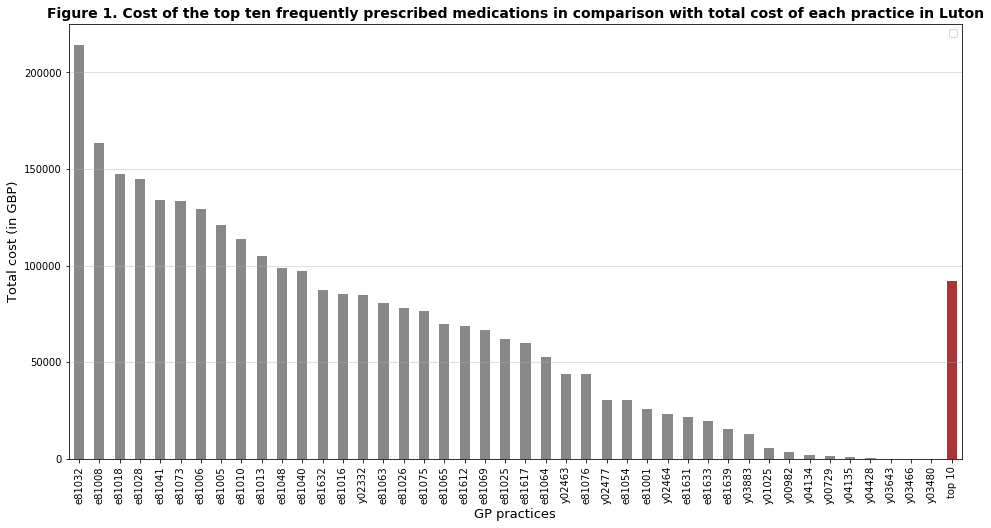

In [29]:
from matplotlib import pyplot as plt    
%matplotlib inline

# Drop overall cost to make a visualisation of GP practices cost cost vs top ten most prescribed medications
total_costs_comparison_luton_no_overall = total_costs_comparison_luton.drop(total_costs_comparison_luton.index[44])

# Set "practice" as index for plotting purposes
total_costs_comparison_luton_no_overall = total_costs_comparison_luton_no_overall.set_index('practice')

# Plot:
ax =total_costs_comparison_luton_no_overall.plot(kind='bar',y='act_cost',color='r',
                                                 figsize=(16, 8), grid=False)

# ***** Colour shadow code adapted as suggested by Rutger Kassies ******
# Source: https://stackoverflow.com/questions/20394091/pandas-matplotlib-make-one-color-in-barplot-stand-out
for bar in ax.patches:
    bar.set_facecolor('#888888')
highlight = 'top10_most_frequently'
pos = total_costs_comparison_luton_no_overall.index.get_loc('top 10')
ax.patches[pos].set_facecolor('#aa3333')
# ********************************************************

# Turn off the legend label
ax.legend('')
# horizontal lines
ax.yaxis.grid(alpha=0.5)

ax.set_title('Figure 1. Cost of the top ten frequently prescribed medications in comparison with total cost of each practice in Luton',
             fontsize=14, fontweight='bold')
#Label x-axe
ax.set_xlabel('GP practices', fontsize=13)
#Label y-axe
ax.set_ylabel('Total cost (in GBP)', fontsize=13)

plt.show()

## A.5 Find the top ten most expensive medications and calculate their total actual cost

In [30]:
# Create a new dataframe called luton_expensive_meds
luton_expensive_meds = prescribing_gp_luton.groupby(['bnf_code','bnf_name'], as_index=False) \
    ['items', 'act_cost', 'quantity'].sum().copy(deep=True)

luton_expensive_meds.head(2)

,bnf_code,bnf_name,items,act_cost,quantity
0,0101010c0aaaaaa,alum hydrox_cap 475mg,1,12.69,120
1,0101010g0aaabab,co-magaldrox_susp 195mg/220mg/5ml s/f,8,26.31,4500


### A.5.1 Calculate of the ten most expensive medications across all practices in Luton (December 2015)

In [31]:
# Calculate cost per unit dispensing of drug
luton_expensive_meds['costs_per_drug'] = luton_expensive_meds['act_cost'] / luton_expensive_meds['quantity']

# Create a rank column based on cost per unit of drug
luton_expensive_meds['ranking'] = luton_expensive_meds['costs_per_drug'].rank(ascending = False)

# Sort rank in ascending order
luton_expensive_meds = luton_expensive_meds.sort_values('ranking', axis=0, ascending=True, kind='quicksort',
                                                        na_position='last')
luton_expensive_meds = luton_expensive_meds.round(1)

# Top 10 most expensive medications
luton_expensive_meds_top10 = luton_expensive_meds.head(10)

#### A.5.1.1 Table 5 - Top ten most expensive medications in Luton, December 2015

In [32]:
# Display top 10 most expensive medications by ranking
luton_expensive_meds_top10[['bnf_code', 'bnf_name', 'costs_per_drug','ranking']]

,bnf_code,bnf_name,costs_per_drug,ranking
2888,0803043n0bbafaf,sandostatin lar_inj 30mg vl + dil,923.4,1.0
2885,0803043n0aaafaf,octreotide acet_inj 30mg vl + dil,923.2,2.0
2891,0803043p0bbagad,somatuline autogel_inj 120mg/0.5ml sspfs,866.4,3.0
2889,0803043n0bbagag,sandostatin lar_inj 20mg vl + dil,739.1,4.0
2886,0803043n0aaagag,octreotide acet_inj 20mg vl + dil,739.1,5.0
2890,0803043p0bbaeae,somatuline autogel_inj 60mg/0.5ml ss pfs,509.5,6.0
5294,21280000128,irypump s irrig system set,448.5,7.0
2592,0605010s0bcagbs,saizen_inj 20mg/2.5ml cart,428.7,8.0
2591,0605010s0bcafbr,saizen_inj 12mg/1.5ml cart,257.2,9.0
2586,0605010s0aabrbr,somatropin (rmc)_inj 12mg/1.5ml cart,257.2,10.0


#### A.5.1.2 Descriptive statistics of the top ten most expensive medications in Luton, December 2015

In [33]:
# Get descriptive statistics:
luton_expensive_meds_top10.costs_per_drug.describe()

count     10.000000
mean     609.230000
std      261.059874
min      257.200000
25%      433.650000
50%      624.300000
75%      834.575000
max      923.400000
Name: costs_per_drug, dtype: float64

## A6. How does prescribing (frequency and costs) in your city compare when using prescribing data from Cambridge as a reference?

### A.6.1 Identify of all GP practices in Cambridge

In [34]:
# Create a dataframe for Cambridge prescribing details
# "town" is only considered as criteria for the query since "shire" will be less specific (many towns in cambridgeshire) 
prescribing_gp_cambridge = prescribing_gp_address[prescribing_gp_address['town'].str.\
                                                  contains('cambridge', na=False)].copy(deep=True)
# Number of GP identified in Cambridge:
prescribing_gp_cambridge.head(2)

,practice,bnf_code,bnf_name,items,act_cost,quantity,surgery_name,town,shire,postcode
4409646,d81001,0101021b0aaahah,alginate_raft-forming oral susp s/f,5,9.31,2050,lensfield medical practice,cambridge,cambridgeshire,cb21eh
4409647,d81001,0101021b0aaalal,sod algin/pot bicarb_susp s/f,5,33.05,3440,lensfield medical practice,cambridge,cambridgeshire,cb21eh


In [35]:
# Number of GP identified in Cambridge:
len(prescribing_gp_cambridge.practice.unique())

35

### A.6.2 Create a new dataframe by linking Luton and Cambridge prescriptions datasets

In [36]:
# Preparation: create a new column called "city" to label Luton and Cambridge accordingly
prescribing_gp_luton['city'] = 'luton'
prescribing_gp_cambridge['city'] = 'cambridge'

In [37]:
# Link both dataframes
prescribing_luton_cambridge= pd.concat([prescribing_gp_luton,prescribing_gp_cambridge])
prescribing_luton_cambridge.shape

(82014, 11)

### A.6.3 Number of prescriptions and cost in Luton and Cambridge in December 2015

In [38]:
# Group the data  by city and get the number of prescriptions (items) and total cost
comparison_by_freq_and_cost = prescribing_luton_cambridge.groupby(['city'], as_index=False)['items', 'act_cost'].sum()

comparison_by_freq_and_cost

,city,items,act_cost
0,cambridge,345193,2607317.49
1,luton,312995,2756331.31


#### A.6.3.1 Prescription difference between Luton and Cambridge in December 2015

In [39]:
# Get the difference in number of prescriptions
# Luton had less prescriptions than Cambridge 
luton_total_prescriptions = comparison_by_freq_and_cost.iloc[1, 1]
cambridge_total_prescriptions = comparison_by_freq_and_cost.iloc[0, 1]
freq_difference = round(luton_total_prescriptions - cambridge_total_prescriptions)
freq_difference

-32198.0

#### A.6.3.2 Percentage difference in terms of frequency between cities

In [40]:
# Calculate percentage of frequency difference in relation to Cambridge
# Negative result means that Luton prescribe less than Cambridge
percentage_frequency_difference = round(freq_difference / cambridge_total_prescriptions * 100, 1)
percentage_frequency_difference

-9.3

#### A.6.3.3. Cost difference between Luton and Cambridge in December 2015

In [41]:
# Get the difference in cost(in GBP £)
# Luton cost was higher than Cambridge
luton_total_cost = comparison_by_freq_and_cost.iloc[1, 2]
cambridge_total_cost = comparison_by_freq_and_cost.iloc[0, 2]
cost_difference = round(luton_total_cost - cambridge_total_cost)
cost_difference

149014.0

#### A.6.3.4 Percentage difference in terms of cost between cities

In [42]:
# Calculate percentage of cost difference in relation to Cambridge
# Positive result means that prescriptions cost in Lutonis greater than in Cambridge
cost_frequency_difference = round(cost_difference / cambridge_total_cost * 100, 1)
cost_frequency_difference

5.7

#### A.6.3.5 Visualising differences of prescriptions and cost between Luton and Cambridge

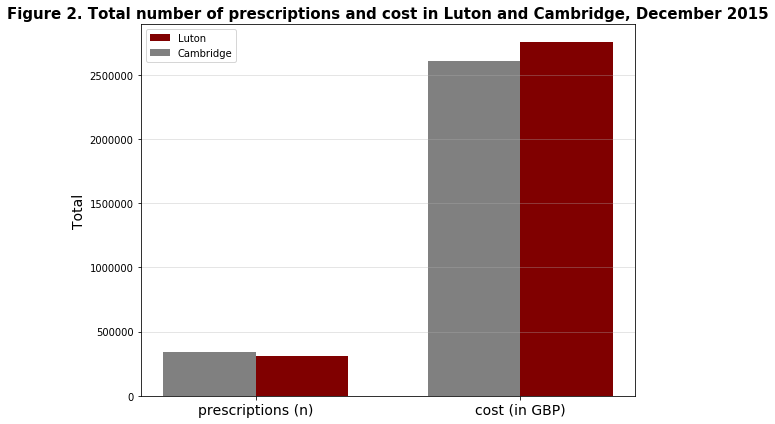

In [43]:
import matplotlib.pyplot as plt
%matplotlib inline
 
# Basic settings:
plt.figure(figsize=(10,6))
bar_width = 0.35

# data to plot
n_groups = 2
index = np.arange(n_groups)
luton = comparison_by_freq_and_cost.loc[1,['items','act_cost']]
cambridge = comparison_by_freq_and_cost.loc[0,['items','act_cost']]
 
# create plots:
bar_luton = plt.bar(index + bar_width, luton, bar_width, color='maroon', label='Luton')
bar_cambridge = plt.bar(index, cambridge , bar_width, color='grey', label='Cambridge')

# Configure axes, grids and create titles and labels
plt.ylabel('Total', fontsize=14)
plt.title('Figure 2. Total number of prescriptions and cost in Luton and Cambridge, December 2015',
          fontsize=15, fontweight='bold')
plt.xticks(index + (bar_width/2), ('prescriptions (n)', 'cost (in GBP)'),  fontsize=14)
plt.grid(True, axis='y', alpha=0.4)

# Turn on the legend
plt.legend()

# Keep tight the plot
plt.tight_layout()

# Show the plot
plt.show()

### A.6.4 Further exploration

In [44]:
# Create a dataframe group by prescribed medications
cambridge_prescriptions_by_bnf = prescribing_gp_cambridge.groupby(['bnf_code','bnf_name'], as_index=False) \
    ['items', 'act_cost'].sum().copy(deep=True)

#### A.6.4.1 Table containing the top ten most frequently prescribed medications (by ranking) across all Cambridge practices (December 2015

In [45]:
# Create a new column with the cost of a precription
cambridge_prescriptions_by_bnf["prescription_cost"] = cambridge_prescriptions_by_bnf['act_cost']/cambridge_prescriptions_by_bnf['items']

# Create a rank column based on frequency of prescriptions
cambridge_prescriptions_by_bnf["ranking"] = cambridge_prescriptions_by_bnf['items'].rank(ascending = False)

# Sort dataframe by frequently prescribed medications
cambridge_prescriptions_by_bnf = cambridge_prescriptions_by_bnf.sort_values('items', \
    axis=0, ascending=False, kind='quicksort', na_position='last')

# Top ten most prescribed medications
most10_prescribed_cambridge = cambridge_prescriptions_by_bnf.head(10)
most10_prescribed_cambridge

,bnf_code,bnf_name,items,act_cost,prescription_cost,ranking
101,0103050p0aaaaaa,omeprazole_cap e/c 20mg,11412,17612.68,1.543347,1.0
812,0209000a0aaabab,aspirin disper_tab 75mg,6181,5333.08,0.862818,2.0
880,0212000y0aaadad,simvastatin_tab 40mg,5637,6541.47,1.160452,3.0
1528,0407010h0aaamam,paracet_tab 500mg,5462,18989.48,3.476653,4.0
626,0206020a0aaaaaa,amlodipine_tab 5mg,4912,5023.58,1.022716,5.0
893,0301011r0aaapap,salbutamol_inha 100mcg (200 d) cff,4777,8399.44,1.758309,6.0
879,0212000y0aaabab,simvastatin_tab 20mg,4340,4498.72,1.036571,7.0
317,0202010b0aaabab,bendroflumethiazide_tab 2.5mg,3875,3783.55,0.976400,8.0
2459,0602010v0aabzbz,levothyrox sod_tab 100mcg,3724,9814.01,2.635341,9.0
2457,0602010v0aabwbw,levothyrox sod_tab 25mcg,3658,14338.16,3.919672,10.0


#### A.6.4.2 Table 6 - comparison of the top ten most frequently prescribed medications: Luton vs Cambridge

In [46]:
# Table above shows common medications prescribed between both cities in the top ten
# Note: six medications (out of ten) were commonly prescribed in the top ten most frequent category
# between Luton and Cambridge
common_med_prescribed_most10= most10_prescribed_luton[most10_prescribed_luton.bnf_code.isin(most10_prescribed_cambridge.bnf_code.values)]

common_med_prescribed_most10[['bnf_code', 'bnf_name']]

,bnf_code,bnf_name
105,0103050p0aaaaaa,omeprazole_cap e/c 20mg
905,0212000y0aaadad,simvastatin_tab 40mg
640,0206020a0aaaaaa,amlodipine_tab 5mg
829,0209000a0aaabab,aspirin disper_tab 75mg
1534,0407010h0aaamam,paracet_tab 500mg
904,0212000y0aaabab,simvastatin_tab 20mg


## A.7 Table 7 - using SQL provide the number of GP practices per city, ordered in descending order

In [47]:
import pandas as pd
# PandaSQL was installed on the terminal by the command -> $ conda install pandasql
from pandasql import PandaSQL
pdsql = PandaSQL()

# Print the table required using the GP address dataframe and PandasSQL
# Some results may be misleading due to typographical errors, data missingness or city names are only
# mentioned in other columns such as "shire"

# Table below only show the first 50 practices for readability, but excluding ".head(20)" will give the full table
print pdsql("SELECT town, COUNT(practice) FROM gp_address_dec2015 GROUP BY town ORDER BY COUNT(practice) DESC",
            locals()).head(20)

                   town  COUNT(practice)
0                  None              339
1            birmingham              173
2             liverpool              137
3                 leeds              122
4            manchester              117
5             sheffield              105
6               bristol               95
7              coventry               95
8                london               92
9              bradford               85
10            leicester               84
11           nottingham               78
12             plymouth               56
13        wolverhampton               56
14  newcastle upon tyne               54
15              preston               49
16       stoke on trent               49
17           sunderland               47
18              walsall               46
19            doncaster               45


## -----------------------------------------------------------------------------------------------------------

# Assignment B


Using the entire dataset from the HSCIC GP Practice Prescribing data, address the following queries using a combination of narrative, tables, figures and descriptive statistics: <br>

** 1. Calculate the monthly total spending for each GP-practice. ** <br>
Calculations were achieved for 9,567 practices by grouping the data using practices’ codes and then adding up their costs [B.1]. In table 8 [B.1.1] can be seen the first five results by GP practice code, town and total spending per practice (mean= £78,201, sd= £70,375; further details in [B.1.2]) for December 2015. Expenditure seems to be spread with extreme values from £0.22 to £923,786.

** 2. Use the number of registered patients in each GP-practice to calculate the relative costs per patient. ** <br>
Data preparation [B.2.2] as well as merging tables [B.2.3] were done before getting the calculations.  The csv file with the total number of patients registered by GP surgery contained information for 7712 surgeries. Merging tables with different number of GP surgeries (9,567 vs 7712) reduced information to 7477 GP surgeries (~ 20% GP surgeries less known from the original file). 

Relative costs per patient results (and how they were achieved) are found in table 9 [B.3.1] but only a few rows of data are shown for readability. Relative costs are widely spread across GP surgeries (mean=£22, sd= £675; [B.3.2]). These results should be interpreted with caution as there are some cases that do not make sense. For instance, e87723 had 1 patient registered with a relative cost of £58,319 (and further analysis or data cleaning needs to be done before considering it as an outlier).

** 3. Visualize the monthly total spending per registered patients for all GP-practices in a scatterplot, show a trend line, and visualize the data for your city within the national scatterplot. ** <br>
Fig. 3 [B.4.2] shows the scatter plot required. The linear trend was found by a first degree polynomial (fitting option available in numpy). Variables correlates well (r=0.88); high positive correlation according to Malawi (2012) criteria for interpreting the size of a correlation coefficient. The linear trend seems to be showing the relative prescription cost per patient (total spending per practice/total number of patients registered at a GP practice). Luton data and the linear model are visually aligned with few data points disperse.

** 4. Visualize the relative costs per patient of all national GP-practices in a histogram. ** <br>
The relative costs histogram can be seen in fig.4. [B.5.2]. The shape of the histogram represents a normal distribution. However, it was troublesome to get it due to extreme values of the relative costs per patient on the right part of the distribution. On further investigation, it was actually found that relative cost for 7 GP surgeries was higher than £100 [B.5.1] when majority of relative cost were lower than £20 as can be seen in fig.4. Therefore, it was decided to exclude them (list in table 10 [B.5.1.1]) taking not only into consideration the extreme relative cost but also the lower number of total patient registered.

** 5. Use descriptive statistics to show how your assigned city compares to the national level. ** <br>
Details of numerical statistics at national level can be consulted in [B.5.6.1] and for Luton in [B.5.6.1]. However, 2 box plots were produced to make an easier comparison (soft grids used as reference). Fig. 5a shows that the relative prescription cost in Luton was lower than the national level (fig. 5b) in December 2015. In Luton, all relative prescription costs were within £5 to 15 with median value of £11 whereas nationally the median was £13 and 75% of values were less than £16, with a much wider distribution and substantial number of extreme values (max= £58,319). Actually, fig. 5b only includes relative costs lower than £25 otherwise it would have been difficult to visually compare both box plots.


## B.1 Calculate the monthly total spending for each GP practice

In [48]:
# Get from A.2.2 the merged dataframe and groupby practice to calculate the total spending
total_costs_practices = prescribing_gp_address.groupby(['practice','town'],
                                                       as_index=False)['act_cost'].sum()

# Rename variable act_cost by total_cost_per_practice
total_costs_practices = total_costs_practices.rename(columns={'act_cost':
                                                              'total_spending_per_practice'})

In [49]:
len(total_costs_practices)

9567

### B.1.1 Table 8 - dataframe shows the expenditure per GP practice in December 2015

In [50]:
# For readability only the first 5 rows are shown:
total_costs_practices.head()

,practice,town,total_spending_per_practice
0,a81001,stockton on tees,83220.57
1,a81002,stockton on tees,333514.67
2,a81003,hartlepool,47977.16
3,a81004,middlesbrough,147494.85
4,a81005,guisborough,107669.51


### B.1.2 Descriptive statistics - total spending for each GP practice

In [51]:
# Get descriptive statistics:
total_costs_practices.describe()

,total_spending_per_practice
count,9567.000000
mean,78201.620121
std,70375.357230
min,0.220000
25%,22818.530000
50%,63809.780000
75%,119616.080000
max,923786.260000


## B.2 Use the number of registered patients in each GP practice

### B.2.1 Retrieve the patients registered at a GP practice file from data.gov.uk to create a pandas dataframe and display general information

In [52]:
# URL: total number patients registered by gp surgery data
url_patients = 'https://digital.nhs.uk/media/28273/Numbers-of-Patients-Registered-at-a-GP-Practice-Jan-2016-GP-Practice-and-quinary-age-groups/Any/gp-reg-patients-prac-quin-age'

# Read the GP practice prescribing data file and rename columns:
patients_dec2015 = pd.read_csv(url_patients, header=0, index_col=False,
                               skiprows=0).rename(columns=lambda x: x.strip().lower())

# Summary of the dataframe
len(patients_dec2015)

7712

In [53]:
patients_dec2015.head(2)

,gp_practice_code,postcode,ons_ccg_code,ccg_code,ons_region_code,nhse_region_code,ons_comm_rgn_code,nhse_comm_region_code,total_all,total_male,...,female_50-54,female_55-59,female_60-64,female_65-69,female_70-74,female_75-79,female_80-84,female_85-89,female_90-94,female_95+
0,A81001,TS18 1HU,E38000075,00K,E39000027,Q74,E40000001,Y54,4234,2061,...,162,139,112,134,104,120,94,59,19,7
1,A81002,TS18 2AW,E38000075,00K,E39000027,Q74,E40000001,Y54,19691,9706,...,833,733,634,636,483,445,362,231,106,22


In [54]:
#  Create a new datafram with (potential) information needed to tackle Section B
patients_registered = patients_dec2015[['gp_practice_code', 'postcode', 'total_all']].copy(deep=True)

In [55]:
# Get information
patients_registered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7712 entries, 0 to 7711
Data columns (total 3 columns):
gp_practice_code    7712 non-null object
postcode            7712 non-null object
total_all           7712 non-null int64
dtypes: int64(1), object(2)
memory usage: 180.8+ KB


In [56]:
# Show firts couple of rows
patients_registered.head(2)

,gp_practice_code,postcode,total_all
0,A81001,TS18 1HU,4234
1,A81002,TS18 2AW,19691


### B.2.2 Data preparation and cleansing for the total patients registered at a GP practice dataframe


#### B.2.2.1 Convert text to lowercase

In [57]:
# Use map function to lowercase the columns below:
for col in ['gp_practice_code', 'postcode']:
    patients_registered[col] = patients_registered[col].map( lambda x: x.lower())
patients_registered.head(2)

,gp_practice_code,postcode,total_all
0,a81001,ts18 1hu,4234
1,a81002,ts18 2aw,19691


#### B.2.2.2 Remove lateral whitespaces

In [58]:
# Delete lateral string spaces
for col in patients_registered.columns:    
    if patients_registered[col].dtype.kind == "O": 
        patients_registered[col] = patients_registered[col].map(lambda x: x.strip())

#### B.2.2.3 Labelling missing values and find the percentages of missingness

In [59]:
# Find empty spaces and replace them with nan values
patients_registered = patients_registered.replace(r'^\s*$', np.nan, regex=True) #  adapted from "Master Yogurt", source:https://stackoverflow.com/questions/13445241/replacing-blank-values-white-space-with-nan-in-pandas 

# Check for missingnes (no missing values were found)
for column in patients_registered.columns: 
    missing = len(patients_registered[patients_registered[column].isnull()])
    print "%-*s  %-*s" % (10,column, 3, 100*round(missing/float(patients_registered.shape[0]),2))

gp_practice_code  0.0
postcode    0.0
total_all   0.0


#### B.2.2.4 Eliminate spaces in postcodes and rename variables

In [60]:
# Eliminate white spaces between words
patients_registered['postcode'] = patients_registered['postcode'].str.replace(' ', '')

# Rename total_all for total_patients
patients_registered = patients_registered.rename(columns={'total_all': 'total_patients'}).sort_values(by=['total_patients'], ascending = False)
patients_registered.head()

,gp_practice_code,postcode,total_patients
5874,m85063,b240sy,60352
584,b82005,yo243wx,55378
4812,k83002,nn172ur,48115
6164,m89003,b904dd,40204
917,b86110,ls29ae,39138


#### B.2.2.5 Checkings before merging:

In [61]:
# Print the lenght of the dataframes, there is a discrepancy possibly related to the fact that
# one file comes monthly and the other quarterly
len(total_costs_practices), len(patients_registered)

(9567, 7712)

### B.2.3 Merge: total cost per practice and number of patients registered

In [62]:
# Merge total cost per practice and total number of patientes dataframes:
total_costs_patients_merged = pd.merge(total_costs_practices,
                  patients_registered[['gp_practice_code', 'total_patients']],
                  left_on='practice' ,
                  right_on='gp_practice_code')

# Drop gp practice code (right table)
total_costs_patients_merged= total_costs_patients_merged.drop('gp_practice_code', axis = 1)
total_costs_patients_merged.head(2)

,practice,town,total_spending_per_practice,total_patients
0,a81001,stockton on tees,83220.57,4234
1,a81002,stockton on tees,333514.67,19691


In [63]:
# Complete number of surgeries after merging
len(total_costs_patients_merged)

7477

## B.3 Calculate relative costs per patient

### B.3.1 Table 9 - calcultations and results for getting the relative costs per patient

In [64]:
# Calculate the relative cost by dividing the total cost (spending) per surgery over
# the total number of patients registered in the GP surgery
total_costs_patients_merged['cost_per_patient'] = total_costs_patients_merged.total_spending_per_practice / total_costs_patients_merged.total_patients

# Print just a few rows:
total_costs_patients_merged.head(5)

,practice,town,total_spending_per_practice,total_patients,cost_per_patient
0,a81001,stockton on tees,83220.57,4234,19.655307
1,a81002,stockton on tees,333514.67,19691,16.937417
2,a81003,hartlepool,47977.16,3357,14.291677
3,a81004,middlesbrough,147494.85,9151,16.117894
4,a81005,guisborough,107669.51,7883,13.658443


### B.3.2 Descriptive statististics - relative costs per patient

In [65]:
# Get the statististics:
total_costs_patients_merged.cost_per_patient.describe()

count     7477.000000
mean        21.684055
std        675.464254
min          0.001872
25%         10.858454
50%         13.329613
75%         15.572978
max      58319.780000
Name: cost_per_patient, dtype: float64

In [66]:
# Get the practice with the highest cost
total_costs_patients_merged[total_costs_patients_merged['cost_per_patient'] > 58319]

,practice,town,total_spending_per_practice,total_patients,cost_per_patient
2503,e87723,london,58319.78,1,58319.78


## B.4  Visualise the monthly total spending per registered patients for all GP-practices in a scatterplot, show a trend line, and visualize the data for Luton within the national scatterplot

### B.4.1 Get the subset for the total cost per patient in GP practices in Luton 

In [67]:
# Find the subset that belongs to Luton by using the dataframe in A.2.1
total_costs_patients_merged_luton = total_costs_patients_merged[total_costs_patients_merged.practice.isin(list_luton_gp_dec2015.practice)]

# Find the total number of surgeries for Luton to include in plot
# There is a discrepancy of data available as the data file containing the total number of
# patients per surgery has less entries than the file with prescriptions, d = 9567-7712 = 1855 which
# represent almost 20% less known patients registered  per surgery in the called:
# "total_costs_patients_merged" dataframe.
# The above affected also numbers in Luton (initial list with 43 GP surgeries) as demostrated below

# Print the number of GP surgeries with total spending information to be plottten in B.4.2
len(total_costs_patients_merged_luton)

32

In [68]:
# Initial number of GP practices identify in Luton
len(list_luton_gp_dec2015.practice.isin(total_costs_patients_merged.practice))

43

### B.4.2 Visualisation of the monthly total spending per registered patients for all GP practices, trend line and the data for Luton, December 2015

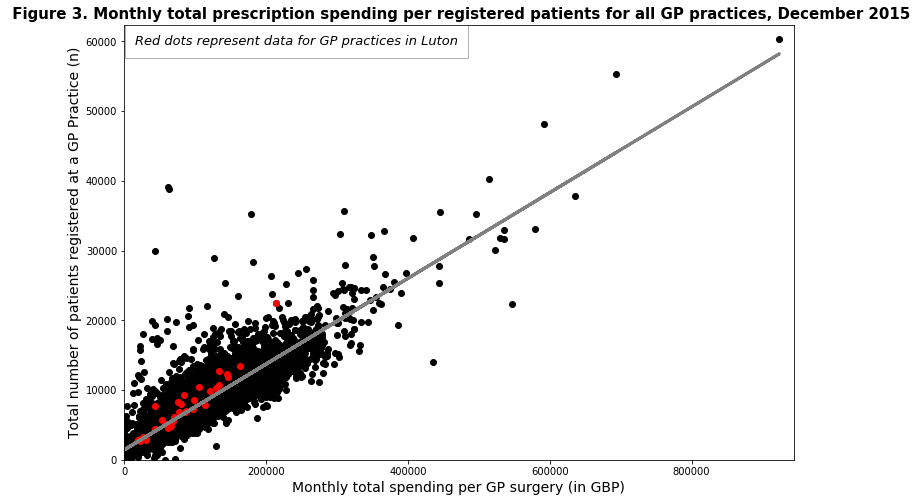

In [69]:
from matplotlib import pyplot as plt    
%matplotlib inline

# In terms of visualisation, the plot was kept as simple as possible, but with the most information needed for easier
# interpretation. For instance using excessive contrasting colours and complex dot styles was avoided.

fig=plt.figure(figsize=(12, 8))
ax=fig.add_subplot(111)

# Data for the national level
x1 = total_costs_patients_merged.total_spending_per_practice
y1 = total_costs_patients_merged.total_patients
# Plot the national level data (all GP surgeries)
ax.scatter(x1, y1, color='black', marker='o')

# Fit data to a linear regression model
fit = np.polyfit(x1, y1, deg=1)
# Plot the adjusted model
ax.plot(x1, fit[0] * x1 + fit[1], color='grey', lw=3) # linear equation: y(x) = a0 + a1(x)

# Data only for Luton
x2 = total_costs_patients_merged_luton.total_spending_per_practice
y2 = total_costs_patients_merged_luton.total_patients
# Plot Luton
ax.scatter(x2, y2, color='red', marker='o')

# # Label titles:
ax.set_title(' Figure 3. Monthly total prescription spending per registered patients for all GP practices, December 2015', fontsize=15, fontweight='bold')
ax.set_xlabel('Monthly total spending per GP surgery (in GBP)',fontsize=14)
ax.set_ylabel('Total number of patients registered at a GP Practice (n)',fontsize=14)

# Set up scale by finding max number to plot and add an offset x = 20k and y-axe = 2k
offest_sx = 20000
offset_sy = 2000
ax.set_xlim(0, total_costs_patients_merged.total_spending_per_practice.max() + offest_sx)
ax.set_ylim(0, total_costs_patients_merged.total_patients.max() + offset_sy)


# Add a textbox inside the plot
ax.text(15000,59500,'Red dots represent data for GP practices in Luton', style='italic', fontsize=13,
        bbox={'facecolor':'white', 'alpha':0.3, 'pad':10}) # adopted from: https://matplotlib.org/users/text_intro.html

# Show table
plt.show()

In [70]:
# Correlation:
total_costs_patients_merged['total_spending_per_practice'].corr(total_costs_patients_merged['total_patients'])
# High positive correlation according to rule of thumb (Malawi, 2012)

0.88118300919918735

## B.5 Visualise the relative costs per patient of all national GP practices in a histogram

### B.5.1 Data preparation for visualisation

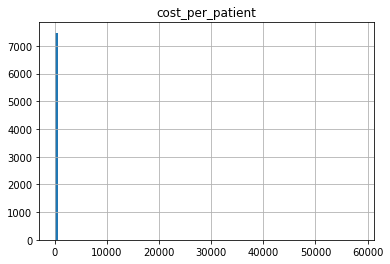

In [71]:
# Fast histogram exploration:
# Plot below seems to be affected by ouliers, therefore further data exploration is required
total_costs_patients_merged.hist(column='cost_per_patient', bins=100)

# Show table
plt.show()

In [72]:
# Get quatitative summaries of the total_costs_patients_merged dataframe
total_costs_patients_merged.describe()

,total_spending_per_practice,total_patients,cost_per_patient
count,7477.000000,7477.000000,7477.000000
mean,98642.880829,7480.185770,21.684055
std,66027.562330,4607.187557,675.464254
min,2.410000,1.000000,0.001872
25%,48720.920000,4037.000000,10.858454
50%,85705.430000,6654.000000,13.329613
75%,134913.620000,10014.000000,15.572978
max,923786.260000,60352.000000,58319.780000


#### B.5.1.1 Table 10 - list of GP surgeries with relative cost per patient above £100

In [73]:
# Find the relative cost per patient higher than £100
total_costs_patients_merged[total_costs_patients_merged['cost_per_patient'] > 100]

,practice,town,total_spending_per_practice,total_patients,cost_per_patient
2503,e87723,london,58319.78,1,58319.780000
3405,g82651,tunbridge wells,3358.69,1,3358.690000
7239,y01924,sawbridgeworth,71547.74,112,638.819107
7244,y02045,macclesfield,626.88,4,156.720000
7287,y02507,halewood,240.47,2,120.235000
7389,y02873,bristol,4960.98,20,248.049000
7450,y04786,ilford,42525.74,316,134.575127


In [74]:
# Create a new dataframe with relative cost per patient less than £100, by doing this the 7 GP surgeries above are excluded
total_costs_patients_less100 = total_costs_patients_merged[total_costs_patients_merged['cost_per_patient'] < 100].copy(deep=True)
total_costs_patients_less100.cost_per_patient.sort_values(ascending=False).head()

7288    81.211333
7115    78.030909
7291    66.018535
3959    63.912488
74      60.696615
Name: cost_per_patient, dtype: float64

In [75]:
# Get quatitative summaries of the  subset with cost per patient < £100
total_costs_patients_less100.describe()

,total_spending_per_practice,total_patients,cost_per_patient
count,7470.000000,7470.000000,7470.000000
mean,98711.009328,7487.134270,13.273736
std,66015.220373,4603.746384,4.249464
min,2.410000,4.000000,0.001872
25%,48804.277500,4041.750000,10.854160
50%,85786.115000,6657.000000,13.326595
75%,134978.780000,10019.750000,15.568142
max,923786.260000,60352.000000,81.211333


### B.5.2 Histogram of the relative costs per patient of all national GP practices excluding potential outliers

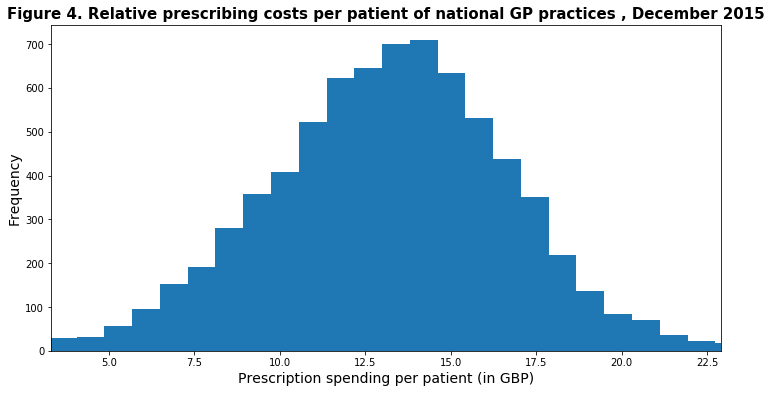

In [76]:
from matplotlib import pyplot as plt    
%matplotlib inline

#Setting up
fig=plt. figure(figsize=(12, 6))

# Assigned dataframe
cost_patient_plot = total_costs_patients_less100

# Get the serie of values to plot in a histogram
x = cost_patient_plot.cost_per_patient.values

# Create the relative costs per patient of all national GP practices histogram
plt.hist(x, bins=100)

# Create title and labels
plt.title("Figure 4. Relative prescribing costs per patient of national GP practices , December 2015",
          fontsize=15, fontweight='bold')
plt.xlabel("Prescription spending per patient (in GBP)", fontsize=14)
plt.ylabel("Frequency", fontsize=14)

# Set limits, 1 to 99 percentile:
min_x = cost_patient_plot['cost_per_patient'].quantile(.01)
max_x = cost_patient_plot['cost_per_patient'].quantile(.99)
plt.xlim(min_x, max_x)

# Show table
plt.show()

## B.5.6 Descriptive statistics to show how Luton compares to the national level.

### B.5.6.1 Descriptive statistics - relative cost per patient,  National level, December 2015

In [77]:
# Get descriptive statistics - national level
total_costs_patients_merged.cost_per_patient.describe()

count     7477.000000
mean        21.684055
std        675.464254
min          0.001872
25%         10.858454
50%         13.329613
75%         15.572978
max      58319.780000
Name: cost_per_patient, dtype: float64

### B.5.6.2 Descriptive statistics - relative cost per patient, Luton, December 2015

In [78]:
# Get descriptive statistics - only luton
total_costs_patients_merged_luton.cost_per_patient.describe()

count    32.000000
mean     10.845005
std       2.099133
min       5.747156
25%       9.456527
50%      11.364362
75%      12.441938
max      14.449110
Name: cost_per_patient, dtype: float64

### B.5.6.3 Visual comparison (boxplot) of the relative cost per patient: Luton vs National level, December 2015

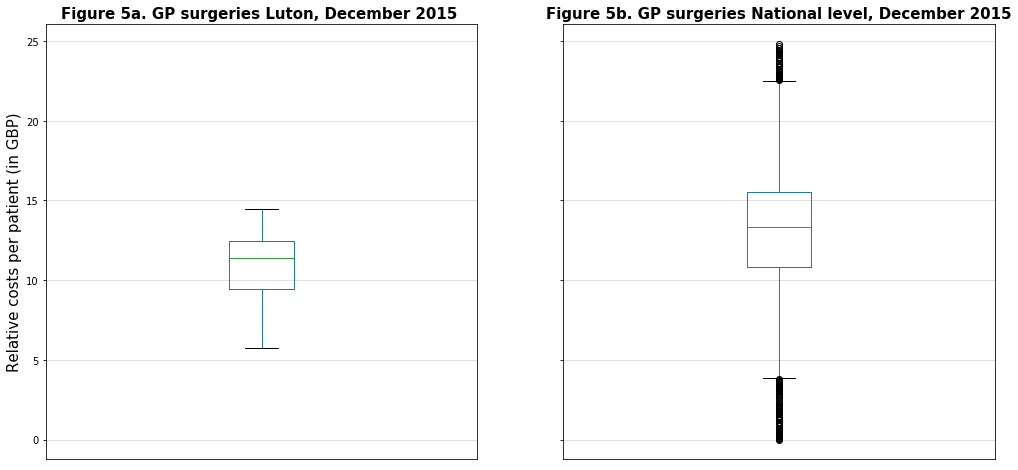

In [79]:
from matplotlib import pyplot as plt    
%matplotlib inline

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=True, figsize=(17,8))

# To make a visual comparison, subset the national level with cost per patient less than £25
total_costs_patients_less25 = total_costs_patients_less100[total_costs_patients_less100['cost_per_patient'] < 25]

# Box plots 
a1 = total_costs_patients_merged_luton.boxplot(column=['cost_per_patient'],ax=ax1)
a2 = total_costs_patients_less25.boxplot(column=['cost_per_patient'],ax=ax2)

# Set titles:
ax1.set_title('Figure 5a. GP surgeries Luton, December 2015 ', fontsize=15, fontweight='bold')
ax2.set_title('Figure 5b. GP surgeries National level, December 2015', fontsize=15, fontweight='bold')

# Hide x labels
ax1.set_xticklabels('')
ax2.set_xticklabels('')

# Turn off grids in x-axe
ax1.axes.get_xaxis().set_visible(False)
ax2.axes.get_xaxis().set_visible(False)

ax1.grid(alpha=0.5)
ax2.grid(alpha=0.5)


# Set label x-axes title:
ax1.set_ylabel('Relative costs per patient (in GBP)', fontsize=15)

# Show the plot
plt.show()

## -----------------------------------------------------------------------------------------------------------

# Assignment C

Using the entire dataset from the HSCIC GP Practice Prescribing data, address the following queries using a combination of narrative, tables, figures and descriptive statistcs: <br>

** 1. Identify for all GP-practices the relative costs per patient for all statin prescriptions (simvastatin, atorvastatin, rosuvastatin, pravastatin, fluvastatin) by using the dataset from December 2015. ** <br>
Identification of all statins prescriptions were possible by using the list of statins provided above (and a logical or operation) [C.1.1]. It was also attempted statin only as search criteria, but there was a drug (nystatin) that does not belong to the group of statins and therefore the first approach was more specific. I was able to find the cost of statins per practice for 8,154 GP practices [C.1.2]. However, final estimations [C.1.4] included statin relative costs per patient for 7,677 GP practices in December 2015 due to differences in the number of entries when merging tables.

** 2. Identify for all GP-practice the associated Index of Multiple Deprivation (IMD) for each GP-Practice in your assigned city. ** <br>
A total of 9,896 GP practices were associated with their IMD [C.2.4.1] despite duplicate postcode values (1,991 duplicates in total). To get these number, the deprivation-by-postcode.csv file was retrieved and data processing applied (details from [C.2.1] to [C.2.3]). <br>

Table 11 [C.2.5] includes 43 GP surgeries in Luton (identified in [A.2.1]) with their associated IMD by rank and decile. IMD decile was chosen over rank as it describes the distribution of IMD values and can be used straightforward as is seen in the following questions. <br>

** 3. Use the entire national dataset and identify the lowest relative spenders of statins from the first decile and the highest relative spenders of statins from the last decile. Now determine for all identified GP-practices for both groups (lowest and the highest) the associated Index of Multiple Deprivation (IMD). Use these two groups to assess whether the IMD-score differs. Use descriptive statistics for your answer. ** <br>
The national dataset was divided into deciles [C.3.1]. From them, the lowest [C.3.2] and highest [C.3.3] relative spenders of statins were identified. The procedure to get IMDs for these two groups can be found in [C.3.5] and [C.3.6]. <br>

There was no evidence to suggest IMD scores were different between both groups by descriptive statistics. This can also be seen from the boxplot in fig. 6 [C.3.7.1]. Median values (imd_decile = 4), 25th percentile (Q1=2), minimum values (imd_decile=1) and maximum values (imd_decile=10) were the same. The only difference was that the distribution in the last decile group was slightly skewed to the right (a one unit decile score difference as seen in the boxplot). [C.3.7.2] and [C.3.7.3] provides full statistical summaries, which can be used to formally compare both means: 4.2 (sd= 2.68) vs 4.73 (sd= 2.79) for the first and last decile respectively. A formal test was not attempted (eg. difference between sample means), but it can be done if required. <br>

** 4. Identify for all GP-practices the associated nine English regions. Identify for each region the associated 75 mortality rate for cardiovascular diseases for the year 2015. ** <br>
There were 9,824 GP practices identified by region [C.4.5]. This was possible by getting information from the National Statistics Postcode Lookup for the United Kingdom and combining it with tables created previously. Identification of GP practices by regions and associated CVD in 2015 were achieved in [C.4.7], but if only 75 mortality rates for CVD by region is required, they can be seen in [C.4.6]. <br>

** 5. Visualize (using matplotlib) for each region spending for statins [x-axis] and the mortality rate [y-axis]. Assess whether relative spending for statin prescriptions in each regions correlates with the mortality rate from cardiovascular diseases. ** <br>
Fig. 7 [C.5.2] shows the region spending for statins and the cardiovascular diseases mortality rate for people aged under 75, December 2015. London spent roughly £1.6M, but its mortality rate (rougly 77) was lower than West Midlands, Yorkshire and the Humber, North East and North West. South East had the lowest mortality rate (around 60), but the expenditure was higher than £2M. Based on the Pearson correlation coefficient (r= 0.45) and the interpretation criteria by Mukaka (2012), the median spending for statin prescriptions in each region and mortality rate from cardiovascular diseases had a low positive correlation. <br>


## C.1 Finding the relative costs per patient for all statins in all GP practices

### C.1.1 Identify all GP practices prescriptions for statins in December 2015

In [80]:
# List of statins:
statin_drugs = ['simvastatin', 'atorvastatin', 'rosuvastatin', 'pravastatin', 'fluvastatin']

# Use the dataframe in section A.2.2.2 and create a dataframe by using the OR (|) character to match
# each of the strings in the list of drugs
# A 2nd approach could've been using directly "statin", but there was a drug (nystatin) that doesn't belong to the group
statins = prescribing_gp_address[prescribing_gp_address.bnf_name.str.contains('|'.join(statin_drugs))]  # code adapted as suggested by Alex Riley, source: https://stackoverflow.com/questions/26577516/pandas-test-if-string-contains-one-of-the-substrings-in-a-list 

statins.shape

(113264, 10)

In [81]:
statins.tail(2)

,practice,bnf_code,bnf_name,items,act_cost,quantity,surgery_name,town,shire,postcode
10271821,y00617,0212000b0aaadad,atorvastatin_tab 80mg,1,0.57,5,frimley primary care ooh,camberley,surrey,gu167uj
10271822,y00617,0212000y0aaadad,simvastatin_tab 40mg,1,1.04,28,frimley primary care ooh,camberley,surrey,gu167uj


### C.1.2 Find the cost of statins per practice

In [82]:
# Find the cost by grouping the GP practices (by practice code and postcode)
costs_statin_practices = statins.groupby(['practice', 'postcode'], as_index=False)['act_cost'].sum()
costs_statin_practices.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8154 entries, 0 to 8153
Data columns (total 3 columns):
practice    8154 non-null object
postcode    8154 non-null object
act_cost    8154 non-null float64
dtypes: float64(1), object(2)
memory usage: 254.8+ KB


In [83]:
costs_statin_practices.head(2)

,practice,postcode,act_cost
0,a81001,ts181hu,1816.80
1,a81002,ts182aw,6513.51


### C.1.3 Insert total number of patients per practice

In [84]:
# Use the dataframe in B.2.2.4 to find the total number of patients registered
# Unidentify GP practice = 7712(patients registered info) - 7677(number of rows on the new dataframe) = 35 
statins_relative_cost = pd.merge(costs_statin_practices,
                       patients_registered[['gp_practice_code','total_patients']],
                              left_on='practice',
                              right_on='gp_practice_code',
                              how= 'inner').drop('gp_practice_code', axis=1)

statins_relative_cost.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7677 entries, 0 to 7676
Data columns (total 4 columns):
practice          7677 non-null object
postcode          7677 non-null object
act_cost          7677 non-null float64
total_patients    7677 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 299.9+ KB


### C.1.4 Calculate the statin relative costs per patient for all GP practices in December 2015

In [85]:
# Create a new column to calculate the statin cost per patient
statins_relative_cost['statin_cost_patient'] = statins_relative_cost.act_cost / statins_relative_cost.total_patients

# Show first five practices with the relative statin cost per patient
statins_relative_cost.head()

,practice,postcode,act_cost,total_patients,statin_cost_patient
0,a81001,ts181hu,1816.80,4234,0.429098
1,a81002,ts182aw,6513.51,19691,0.330786
2,a81003,ts268db,868.39,3357,0.258680
3,a81004,ts13be,2134.60,9151,0.233264
4,a81005,ts147dj,1887.11,7883,0.239390


In [86]:
# Display size of the datafrme
statins_relative_cost.shape

(7677, 5)

## C.2 Index of Multiple Deprivation (IMD) for all GP practices and for Luton GP practices

### C.2.1 Functions created¶


In [87]:
# Function 1 (F1) creates a dataframe based on data retrieved from a csv file available on an specific website
# Input URL
# Output: dataframe
def create_dataframe(current_url): 
    # Create a dataframe
    # Replace spaces between words with underscore and eliminate lateral white spaces for colum names
    temp_dataframe = pd.read_csv(current_url, header=0, index_col=False, skiprows=0).rename(columns=lambda x:\
                                                                         x.replace(" ","_").lower())
    return temp_dataframe


# Function 2 (F2) performs a basic data cleaning and transformation
# Input: dataframe of interest
# Output: return a dataframe with data to string if it is an object, lower case values and get rid of lateral spaces 
def basic_data_cleaning(current_df):       
    for col in current_df.columns:    
        if current_df[col].dtype.kind == "O": # object type
            current_df[col] = current_df[col].astype('str')
            current_df[col] = current_df[col].map(lambda x: x.lower().strip())
                                                  
    return current_df


# Function 3 (F3) reports a summary of missignes in the data set either by showing the number of data missing or
# by displaying the number of data that exist per variable
# It requires as input a dataframe
def missing_val (current_df):
    print 'Number of data unavailable:'
    print current_df.isnull().sum().count
    print
    print 'Number of non-zero values in the dataset'
    print current_df.count()
    return

### C.2.2 Retrieve full dataset from dmhr-data website to create a IMD dataframe and display general information

In [88]:
# Deprivation indices by postcode URL:
IMD_url = 'https://s3.eu-west-2.amazonaws.com/dmhr-data/deprivation-by-postcode.csv'

# Create a dataframe with the deprivation indices data:
raw_IMD = create_dataframe(IMD_url) # It uses function 1 in C.2.1

In [89]:
# List first couple of rows
raw_IMD.head(2)

,postcode,postcode_status,lsoa_code,lsoa_name,index_of_multiple_deprivation_rank,index_of_multiple_deprivation_decile,income_rank,income_decile,income_score,employment_rank,...,barriers_to_housing_and_services_rank,barriers_to_housing_and_services_decile,living_environment_rank,living_environment_decile,idaci_rank,idaci_decile,idaci_score,idaopi_rank,idaopi_decile,idaopi_score
0,TS18 1HU,Live,E01033477,Stockton-on-Tees 014G E01033477,73.0,1.0,196.0,1.0,0.474,123.0,...,20035.0,7.0,2868.0,1.0,2226.0,1.0,0.422,817.0,1.0,0.500
1,TS18 2AW,Live,E01012267,Stockton-on-Tees 014F E01012267,551.0,1.0,433.0,1.0,0.434,215.0,...,25114.0,8.0,16862.0,6.0,4415.0,2.0,0.354,427.0,1.0,0.552


In [90]:
# Get further data information:
raw_IMD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9906 entries, 0 to 9905
Data columns (total 28 columns):
postcode                                   9906 non-null object
postcode_status                            9906 non-null object
lsoa_code                                  9896 non-null object
lsoa_name                                  9896 non-null object
index_of_multiple_deprivation_rank         9896 non-null float64
index_of_multiple_deprivation_decile       9896 non-null float64
income_rank                                9896 non-null float64
income_decile                              9896 non-null float64
income_score                               9896 non-null float64
employment_rank                            9896 non-null float64
employment_decile                          9896 non-null float64
employment_score                           9896 non-null float64
education_and_skills_rank                  9896 non-null float64
education_and_skills_decile                9896 non-

### C.2.3 Data preparation and cleansing for the IMD dataframe

#### C.2.3.1 Variable selection¶

In [91]:
# Select a subset with potential useful variables
imd_selected_data = raw_IMD[['postcode','index_of_multiple_deprivation_rank','index_of_multiple_deprivation_decile']].copy(deep=True)
imd_selected_data.head(2)

,postcode,index_of_multiple_deprivation_rank,index_of_multiple_deprivation_decile
0,TS18 1HU,73.0,1.0
1,TS18 2AW,551.0,1.0


In [92]:
# Rename colums IMD rank and decile
imd_selected_data = imd_selected_data.rename(index=str, columns={'index_of_multiple_deprivation_rank':'imd_rank', 'index_of_multiple_deprivation_decile':'imd_decile'})
imd_selected_data.head(2)                       

,postcode,imd_rank,imd_decile
0,TS18 1HU,73.0,1.0
1,TS18 2AW,551.0,1.0


#### C.2.3.2 Data cleansing¶

In [93]:
# Perform basic data cleaning based using F2 (see C.2.1) - lower case, elimination of white spaces and data format
imd_selected_data = basic_data_cleaning(imd_selected_data)

# Eliminate white spaces within postcodes
imd_selected_data['postcode'] = imd_selected_data['postcode'].str.replace(' ', '')

imd_selected_data.head(2)

,postcode,imd_rank,imd_decile
0,ts181hu,73.0,1.0
1,ts182aw,551.0,1.0


#### C.2.3.3 Dealing with missing data¶

In [94]:
# Missing values on IMD dataset
# Results shows only 10 of 9906 data missing in either IMD rank or IMD decile
missing_report_imd = missing_val(imd_selected_data) # It uses function 3 in C.2.1

Number of data unavailable:
<bound method Series.count of postcode       0
imd_rank      10
imd_decile    10
dtype: int64>

Number of non-zero values in the dataset
postcode      9906
imd_rank      9896
imd_decile    9896
dtype: int64


In [95]:
# Subset a dataframe that shows values missing:
missing_data_imd = imd_selected_data[imd_selected_data.imd_rank.isnull()]
missing_data_imd

# Note: none of them include postcodes in Luton (starting with LU)

,postcode,imd_rank,imd_decile
3256,me122tz,NaN,NaN
7233,ld71hb,NaN,NaN
7336,dl154sb,NaN,NaN
7589,dn18qn,NaN,NaN
8173,cv115po,NaN,NaN
8410,tw152ea,NaN,NaN
8933,hu32ae,NaN,NaN
9056,yo302js,NaN,NaN
9299,wr59qt,NaN,NaN
9359,gl10qd,NaN,NaN


In [96]:
# Drop missing rows:
imd_selected_data = imd_selected_data.dropna(axis=0, how='any')

# Reset index accordingly (needed due to the drop function)
imd_selected_data.reset_index(drop=True, inplace=True)

imd_selected_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9896 entries, 0 to 9895
Data columns (total 3 columns):
postcode      9896 non-null object
imd_rank      9896 non-null float64
imd_decile    9896 non-null float64
dtypes: float64(2), object(1)
memory usage: 232.0+ KB


#### C.2.3.4 Further data preparation - modification of data types¶

In [97]:
# Modify IMD rank and decile from float to integer type
imd_selected_data['imd_rank'] = imd_selected_data['imd_rank'].astype(int)
imd_selected_data['imd_decile'] = imd_selected_data['imd_decile'].astype(int)

# List a couple rows
imd_selected_data.head(2)

,postcode,imd_rank,imd_decile
0,ts181hu,73,1
1,ts182aw,551,1


#### C.2.3.5 Dealing with duplicates¶

In [98]:
# Get total number of duplicates rows
imd_selected_data.duplicated().sum()

1991

In [99]:
# Total number of unique postcodes
len(imd_selected_data.postcode.unique())

7905

In [100]:
# Total number of postcode duplicated
imd_selected_data.postcode.duplicated().sum() # that makes the total 7905 + 1991 = 9896

1991

In [101]:
# Eliminate duplicates
imd_selected_data.drop_duplicates(subset='postcode', keep='first', inplace=True)
imd_selected_data.reset_index(drop=True, inplace=True)

In [102]:
# Verify range of entries
imd_selected_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7905 entries, 0 to 7904
Data columns (total 3 columns):
postcode      7905 non-null object
imd_rank      7905 non-null int64
imd_decile    7905 non-null int64
dtypes: int64(2), object(1)
memory usage: 185.3+ KB


#### C.2.3.6 IMD dataframe by postcode ready for further processing/analysis¶

In [103]:
# Dataframe with IMD values
imd_ready = imd_selected_data.copy(deep=True)
imd_ready.head(2)

,postcode,imd_rank,imd_decile
0,ts181hu,73,1
1,ts182aw,551,1


### C.2.4 Index of Multiple Deprivation for all GP practices

In [104]:
# gp_address_dec2015 = 9906 "unique" surgeries
# imd_all_gps = 9896 rows
# Unable to identify 10 (9906-9896) GP surgeries with their respective IMD
# Note: there are 9,906 unique pracice codes but 1,991 postcodes duplicates. There are more than one surgery
# sharing the same postcode as it can be observed in the duplicates results below.
imd_all_gps = pd.merge(gp_address_dec2015[['practice','postcode']],
                       imd_ready,
                       on='postcode',
                       how= 'inner')

imd_all_gps.shape

(9896, 4)

In [105]:
# Number of duplicated values in the gp_address_dec2015 dataframe by practice code
gp_address_dec2015.practice.duplicated().sum()


0

In [106]:
# Number of duplicated values in the gp_address_dec2015 dataframe by postcode
gp_address_dec2015.postcode.duplicated().sum()


1991

#### C.2.4.1 IMD for all GP practices listed in alphabetical order, December 2015 - for readability only few rows are shown

In [107]:
# Dataframe with the first five rows of IMD for all GP practices listed in alphabetical order
imd_all_gps = imd_all_gps.sort_values('practice', axis=0, ascending=True, kind='quicksort', na_position='last')

# First five rows shown for readability reasons (table exceeds size of the screen)
imd_all_gps.head()

,practice,postcode,imd_rank,imd_decile
0,a81001,ts181hu,73,1
4,a81002,ts182aw,551,1
5,a81003,ts268db,967,1
8,a81004,ts13be,1914,1
9,a81005,ts147dj,7082,3


### C.2.5 Table 11 - Index of Multiple Deprivation for Luton GP practices, December 2015

In [108]:
# Subset using postcode identified in the dataframe in A.2.1
imd_luton = imd_all_gps[imd_all_gps.postcode.isin(list_luton_gp_dec2015.postcode)]

# Show the full table
imd_luton

,practice,postcode,imd_rank,imd_decile
1965,e81001,lu20nn,3999,2
1972,e81005,lu11bw,5153,2
1973,e81006,lu29au,11249,4
1976,e81008,lu40tr,12415,4
1978,e81010,lu49qz,12534,4
1981,e81013,lu13ag,5290,2
1984,e81016,lu48dg,8295,3
1986,e81018,lu31rw,7897,3
1993,e81025,lu49fj,5595,2
1994,e81026,lu29sb,26370,9


In [109]:
# Display number of GP surgeries identified in Luton
len(imd_luton)

43

## C.3 Relative spenders of statins from the first and last decile and associated Index of Multiple Deprivation (IMD)

### C.3.1 Identify the relative statin cost per patients by deciles

In [110]:
# Use pandas.qcut to divide the dataframe by deciles and create a new column (statin decile) and 
# attached a label from 1 to 10 to make explicit the decile of reference (standard is 0-9)
statins_relative_cost['statin_decile'] = pd.qcut(statins_relative_cost['statin_cost_patient'],
                                                 10, labels=np.arange(1, 11))

# First five rows shown for readability reasons (table exceeds size of the screen)
statins_relative_cost.head()

,practice,postcode,act_cost,total_patients,statin_cost_patient,statin_decile
0,a81001,ts181hu,1816.80,4234,0.429098,10
1,a81002,ts182aw,6513.51,19691,0.330786,9
2,a81003,ts268db,868.39,3357,0.258680,7
3,a81004,ts13be,2134.60,9151,0.233264,6
4,a81005,ts147dj,1887.11,7883,0.239390,7


### C.3.2 Lowest relative spenders of statins (first decile)

In [111]:
statins_relative_cost_1st_decile = statins_relative_cost[statins_relative_cost['statin_decile'] == 1]

# First five rows shown for readability reasons (table exceeds size of the screen)
statins_relative_cost_1st_decile.head()

,practice,postcode,act_cost,total_patients,statin_cost_patient,statin_decile
70,a81621,ts39nb,177.98,2245,0.079278,1
74,a81630,ts54eq,15.45,712,0.021699,1
76,a81632,ts181hu,31.51,664,0.047455,1
77,a81633,ts15ef,11.69,917,0.012748,1
78,a81634,ts182ep,32.48,1533,0.021187,1


### C.3.3 Highest relative spenders of statins (last decile)

In [112]:
statins_relative_cost_last_decile = statins_relative_cost[statins_relative_cost['statin_decile'] == 10]

# First five rows shown for readability reasons (table exceeds size of the screen)
statins_relative_cost_last_decile.head()

,practice,postcode,act_cost,total_patients,statin_cost_patient,statin_decile
0,a81001,ts181hu,1816.80,4234,0.429098,10
7,a81008,ts66td,1398.07,4027,0.347174,10
12,a81014,ts232la,1344.87,3821,0.351968,10
22,a81025,ts181hu,1863.48,4162,0.447737,10
57,a81066,ts211js,1638.63,4281,0.382768,10


### C.3.4 Relative spender of statins and IMD 

In [113]:
# statins_relative_cost per surgery = 7677
# imd_all_gps = 9896 gps known
# merged_statins_imd = 7675 entries
# Unable to indentify 2 GP surgeries (7677- 7675) with their respective statin relative cost and IMD

# Get the table by merging dataframes in C.3.1 and C.2.4.1
merged_statins_imd = pd.merge(statins_relative_cost,
                              imd_all_gps [['practice','imd_rank','imd_decile']],
                              on='practice',
                              how= 'inner')

# First five rows shown for readability reasons (table exceeds size of the screen)
merged_statins_imd.head()

,practice,postcode,act_cost,total_patients,statin_cost_patient,statin_decile,imd_rank,imd_decile
0,a81001,ts181hu,1816.80,4234,0.429098,10,73,1
1,a81002,ts182aw,6513.51,19691,0.330786,9,551,1
2,a81003,ts268db,868.39,3357,0.258680,7,967,1
3,a81004,ts13be,2134.60,9151,0.233264,6,1914,1
4,a81005,ts147dj,1887.11,7883,0.239390,7,7082,3


In [114]:
merged_statins_imd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7675 entries, 0 to 7674
Data columns (total 8 columns):
practice               7675 non-null object
postcode               7675 non-null object
act_cost               7675 non-null float64
total_patients         7675 non-null int64
statin_cost_patient    7675 non-null float64
statin_decile          7675 non-null category
imd_rank               7675 non-null int64
imd_decile             7675 non-null int64
dtypes: category(1), float64(2), int64(3), object(2)
memory usage: 487.6+ KB


### C.3.5 Relative spenders of statins by GP surgeries from the first decile and their Index of Multiple Deprivation 


In [115]:
# Get the subset by using dataframe in C.3.2 for the isin criteria
statins_imd_1st_decile = merged_statins_imd[merged_statins_imd.practice.isin(statins_relative_cost_1st_decile.practice)]

# Show table - only first five rows of the table due to the table exceeds size of the screen
statins_imd_1st_decile.head()

,practice,postcode,act_cost,total_patients,statin_cost_patient,statin_decile,imd_rank,imd_decile
70,a81621,ts39nb,177.98,2245,0.079278,1,376,1
74,a81630,ts54eq,15.45,712,0.021699,1,3207,1
76,a81632,ts181hu,31.51,664,0.047455,1,73,1
77,a81633,ts15ef,11.69,917,0.012748,1,81,1
78,a81634,ts182ep,32.48,1533,0.021187,1,1428,1


### C.3.6 Relative spenders of statins by GP surgeries from the last decile and their Index of Multiple Deprivation 

In [116]:
# Get the subset by using dataframe in C.3.3 for the isin criteria
statins_imd_last_decile = merged_statins_imd[merged_statins_imd.practice.isin(statins_relative_cost_last_decile.practice)]

# Show table - only first five rows of the table due to the table exceeds size of the screen
statins_imd_last_decile.head()

,practice,postcode,act_cost,total_patients,statin_cost_patient,statin_decile,imd_rank,imd_decile
0,a81001,ts181hu,1816.80,4234,0.429098,10,73,1
7,a81008,ts66td,1398.07,4027,0.347174,10,664,1
12,a81014,ts232la,1344.87,3821,0.351968,10,6011,2
22,a81025,ts181hu,1863.48,4162,0.447737,10,73,1
57,a81066,ts211js,1638.63,4281,0.382768,10,15355,5


### C.3.7 Descriptive statistics to compare both groups and assess whether the IMD-score differs between them.¶

 #### C.3.7.1 Visual comparison (boxplot) of the lowest and highest relative spenders of statins and their IMD score difference, December 2015

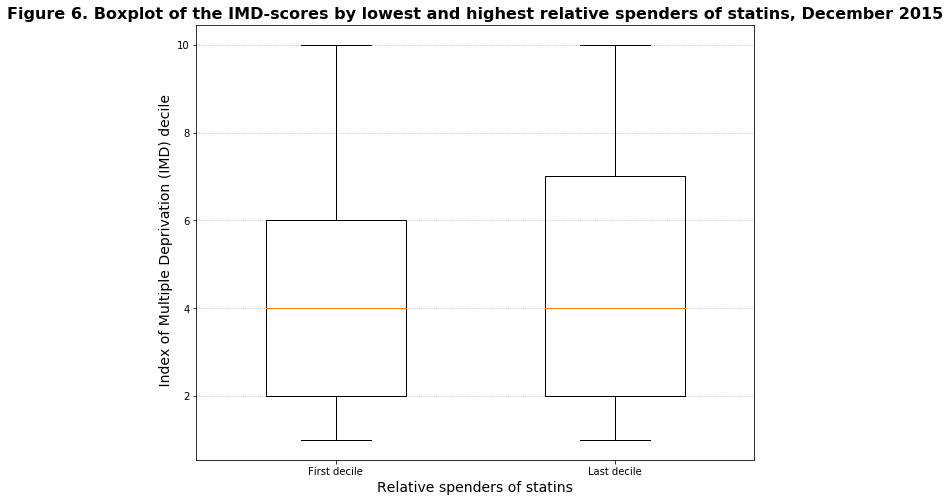

In [117]:
from matplotlib import pyplot as plt    
%matplotlib inline

# This box plot was used as visual aid to notice whether there is a difference or not between both groups

# Settings for the new figure to be created
fig=plt.figure(figsize=(10, 8))

# Series of data to be plot for the first and last statin relative cost to find IMD score differences
first_statin = statins_imd_1st_decile.imd_decile
last_statin = statins_imd_last_decile.imd_decile

# Labels to be display per boxplot
labels = ('First decile', 'Last decile')

# Plot both statin groups:
plt.boxplot ([first_statin, last_statin],labels=labels, widths=(0.5, 0.5))

# Create titles
plt.title("Figure 6. Boxplot of the IMD-scores by lowest and highest relative spenders of statins, December 2015",
          fontsize=16, fontweight='bold')
plt.xlabel("Relative spenders of statins", fontsize=14)
plt.ylabel(" Index of Multiple Deprivation (IMD) decile", fontsize=14)

# Grid settings: set y axes on and show a soft line for reference
plt.grid(True, axis='y', linestyle=':')

# Display a figure
plt.show()

 #### C.3.7.2 IMD descriptive statistics  - relative spenders of statins by GP surgeries from the first decile

In [118]:
statins_imd_1st_decile.imd_decile.describe()


count    768.000000
mean       4.247396
std        2.680509
min        1.000000
25%        2.000000
50%        4.000000
75%        6.000000
max       10.000000
Name: imd_decile, dtype: float64

 #### C.3.7.3 IMD descriptive statistics  - relative spenders of statins by GP surgeries from the last decile

In [119]:
statins_imd_last_decile.imd_decile.describe()


count    768.000000
mean       4.729167
std        2.789360
min        1.000000
25%        2.000000
50%        4.000000
75%        7.000000
max       10.000000
Name: imd_decile, dtype: float64

## C4. Identification of English regions and associated 75 mortality rate for cardiovascular diseases for the year 2015

### C.4.1 Retrieve full dataset from dmhr-data website to create dataframes and perform basic formatting in headings¶


#### C.4.1.1 Retrive dataset with postcodes

In [120]:
# Postcode URL:
postcode_lookup_url = 'https://s3.eu-west-2.amazonaws.com/dmhr-data/postcodes.csv'

# Create a dataframe with the postcode data:
raw_postcodes = create_dataframe(postcode_lookup_url) # F1 is used (see functions in C.2.1)

#### C.4.1.2 Retrive dataset with cardiovascular mortality rate

In [121]:
# Under 75 mortality rate from cardiovascular disease URL:
under75_mortality_url = 'https://s3.eu-west-2.amazonaws.com/dmhr-data/NHSOF_1.1_I00656_D.csv'

# Create a dataframe with under 75 mortality rate data:
under75_mortality_raw = create_dataframe(under75_mortality_url) # F1 is used (see functions in C.2.1)

### C.4.2 Initial data exploration¶

#### C.4.2.1 Data exporation - Postcodes dataframe

In [122]:
# List first couple of rows
raw_postcodes.head(2)

,postcode_1,postcode_2,postcode_3,date_introduced,user_type,easting,northing,positional_quality,county_code,county_name,...,middle_super_output_area_code,middle_super_output_area_name,output_area_classification_code,output_area_classification_name,longitude,latitude,spatial_accuracy,last_uploaded,location,socrata_id
0,S20 6RU,S20 6RU,S20 6RU,06-1997,0,441432.0,382852.0,1,E99999999,(pseudo) England (UA/MD/LB),...,E02001671,NaN,6B3,Suburbanites;Semi-detached suburbia;Semi-detac...,-1.379193,53.340953,Postcode Level,21/09/2017,"(53.340953, -1.379193)",1311804
1,TW4 7BD,TW4 7BD,TW4 7BD,01-1980,0,512373.0,175453.0,1,E99999999,(pseudo) England (UA/MD/LB),...,E02000541,NaN,4B1,Multicultural metropolitans;Challenged Asian t...,-0.383652,51.466899,Postcode Level,21/09/2017,"(51.466899, -0.383652)",1630253


In [123]:
# Get further data information: type of data, variables included and size
raw_postcodes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1756189 entries, 0 to 1756188
Data columns (total 36 columns):
postcode_1                         object
postcode_2                         object
postcode_3                         object
date_introduced                    object
user_type                          int64
easting                            float64
northing                           float64
positional_quality                 int64
county_code                        object
county_name                        object
local_authority_code               object
local_authority_name               object
ward_code                          object
ward_name                          object
country_code                       object
country_name                       object
region_code                        object
region_name                        object
parliamentary_constituency_code    object
parliamentary_constituency_name    object
european_electoral_region_code     object
europ

#### C.4.2.2 Data exporation - Cardiovascular disease (mortality) dataframe

In [124]:
# List first couple of rows
under75_mortality_raw.head(2)

,year,period_of_coverage,breakdown,level,level_description,gender,age,indicator_value,lower_ci,upper_ci,numerator,denominator
0,2016,1/1/2016 to 31/12/2016,England,England,England,Person,All,72.7,71.9,73.5,"33,816","50,798,600"
1,2015,1/1/2015 to 31/12/2015,England,England,England,Person,All,74,73.3,74.8,"33,664","50,360,500"


In [125]:
# List last couple of rows
under75_mortality_raw.tail(2)

,year,period_of_coverage,breakdown,level,level_description,gender,age,indicator_value,lower_ci,upper_ci,numerator,denominator
1048,2009,1/1/2009 to 31/12/2009,Deprivation decile,9,9,Male,All,85.8,81.9,89.7,"1,890","2,378,200"
1049,2009,1/1/2009 to 31/12/2009,Deprivation decile,10,10 - Least deprived,Male,All,75.5,71.9,79.2,"1,670","2,330,500"


In [126]:
# Get further data information:
under75_mortality_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 12 columns):
year                  1050 non-null int64
period_of_coverage    1050 non-null object
breakdown             1050 non-null object
level                 1050 non-null object
level_description     1050 non-null object
gender                1050 non-null object
age                   1050 non-null object
indicator_value       1050 non-null object
lower_ci              1050 non-null object
upper_ci              1050 non-null object
numerator             1050 non-null object
denominator           1050 non-null object
dtypes: int64(1), object(11)
memory usage: 98.5+ KB


### C.4.3 Data preparation and cleansing for the postcodes dataframe¶

#### C.4.3.1 Variable selection

In [127]:
# Select the subset with potential useful variables
# Potentially only 'postcode_1','postcode_2', 'postcode_3','region_code', and 'region_name' will be useful
postcodes_selected_col = raw_postcodes[['postcode_1','postcode_2', 'postcode_3','region_code','region_name']].copy(deep=True)
postcodes_selected_col.head(2)

,postcode_1,postcode_2,postcode_3,region_code,region_name
0,S20 6RU,S20 6RU,S20 6RU,E12000003,Yorkshire and The Humber
1,TW4 7BD,TW4 7BD,TW4 7BD,E12000007,London


#### C.4.3.2 Data cleansing¶

In [128]:
# Perform basic data cleaning based using function 2 in C.2.1
postcodes_selected_col = basic_data_cleaning(postcodes_selected_col) 

# Eliminate white spaces on postcodes
postcodes_selected_col['postcode_1'] = postcodes_selected_col['postcode_1'].str.replace(' ', '')
postcodes_selected_col['postcode_2'] = postcodes_selected_col['postcode_2'].str.replace(' ', '')
postcodes_selected_col['postcode_3'] = postcodes_selected_col['postcode_3'].str.replace(' ', '')

postcodes_selected_col.head(2)

,postcode_1,postcode_2,postcode_3,region_code,region_name
0,s206ru,s206ru,s206ru,e12000003,yorkshire and the humber
1,tw47bd,tw47bd,tw47bd,e12000007,london


#### C.4.3.3 Verify and keep postcodes 2 and 3  if they are different from 1

In [129]:
# Compare postcode between columns 1 & 2 (by not equal comparison)
postcode_1_2_noequal = postcodes_selected_col[postcodes_selected_col['postcode_1'] != postcodes_selected_col['postcode_2']]

# Show the number of different entries
len(postcode_1_2_noequal)

0

In [130]:
# Compare postcode between columns 1 & 3 (by not equal comparison)
postcode_1_3_noequal = postcodes_selected_col[postcodes_selected_col['postcode_1'] != postcodes_selected_col['postcode_3']]

# Show the number of different entries
len(postcode_1_3_noequal)

0

In [131]:
# Eliminate columns label as postcode_2 and postcode_3 as they are not needed
postcodes_selected_col.drop(['postcode_2','postcode_3'], axis = 1, inplace=True)
postcodes_selected_col.head(2)

,postcode_1,region_code,region_name
0,s206ru,e12000003,yorkshire and the humber
1,tw47bd,e12000007,london


#### C.4.3.4 Dealing with duplicates¶

In [132]:
# Total number of unique postcodes
len(postcodes_selected_col.postcode_1.unique())

1756189

In [133]:
# Total number of postcode duplicated
postcodes_selected_col.postcode_1.duplicated().sum() # that makes the total 7905 + 1991 = 9896
0

0

In [134]:
# Total number of duplicates by row
postcodes_selected_col.duplicated().sum()

0

#### C.4.3.5 Missingness

In [135]:
# Generate a report of data missing based on F3 (see functions at the beginning of C.2.1)
missing_report_postcode = missing_val(postcodes_selected_col)

# I was unable to find missing values, an unexpected result (perhaps related to the quality of the data).

Number of data unavailable:
<bound method Series.count of postcode_1     0
region_code    0
region_name    0
dtype: int64>

Number of non-zero values in the dataset
postcode_1     1756189
region_code    1756189
region_name    1756189
dtype: int64


#### C.4.3.6 Dataframe by postcode and regions ready for further processing/analysis

In [136]:
# Dataframe with the right structure for further joins/analysis
regions_by_postcodes = postcodes_selected_col.copy(deep=True)
regions_by_postcodes.head(2)

,postcode_1,region_code,region_name
0,s206ru,e12000003,yorkshire and the humber
1,tw47bd,e12000007,london


### C.4.4 Data preparation and cleansing for the cardiovascular mortality rate dataframe 

#### C.4.4.1 Variable selection

In [137]:
# Age,lower snd upper ci,'upper_ci',numerator and denominator as well as age are unlikely to be used as can be seen 
# from the data dictionary documentation. Available at: 
# https://beta.digital.nhs.uk/binaries/content/documents/corporate-website/publication-system/clinical-indicators/nhs-outcomes-framework/current/domain-1-preventing-people-from-dying-prematurely-nof/1-1-under-75-mortality-rate-from-cardiovascular-disease/1-1-under-75-mortality-rate-from-cardiovascular-disease/publicationsystem%3AFiles-v3%5B3%5D/publicationsystem%3AattachmentResource
# and
# https://beta.digital.nhs.uk/publications/clinical-indicators/nhs-outcomes-framework/current/domain-1-preventing-people-from-dying-prematurely-nof/1-1-under-75-mortality-rate-from-cardiovascular-disease
# URLs above were found at the general search of clinical Indicators website from NHS digital: https://beta.digital.nhs.uk/

# Select a subset with potential useful variables:
under75_selected_col = under75_mortality_raw.drop(['period_of_coverage', 'age','lower_ci','upper_ci',
                                                   'numerator','denominator'], axis=1).copy(deep=True)

under75_selected_col.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 6 columns):
year                 1050 non-null int64
breakdown            1050 non-null object
level                1050 non-null object
level_description    1050 non-null object
gender               1050 non-null object
indicator_value      1050 non-null object
dtypes: int64(1), object(5)
memory usage: 49.3+ KB


#### C.4.4.2 Data cleansing

In [138]:
# Make a copy of the under75_selected_col dataframe to change data types and keep separated the dataframes
under75_modify_dtype = under75_selected_col.copy(deep=True)

# Transform indicator value to numerical
under75_modify_dtype['indicator_value'] = pd.to_numeric(under75_modify_dtype['indicator_value'], errors='coerce')

# Perform basic data cleaning using function 2 (see C.2.1)
under75_modify_dtype = basic_data_cleaning(under75_modify_dtype)

In [139]:
# Show changes on data types
under75_modify_dtype.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 6 columns):
year                 1050 non-null int64
breakdown            1050 non-null object
level                1050 non-null object
level_description    1050 non-null object
gender               1050 non-null object
indicator_value      1046 non-null float64
dtypes: float64(1), int64(1), object(4)
memory usage: 49.3+ KB


In [140]:
# Display the first 2 rows of data (string data is lower case and no white spaces)
under75_modify_dtype.head(2)

,year,breakdown,level,level_description,gender,indicator_value
0,2016,england,england,england,person,72.7
1,2015,england,england,england,person,74.0


#### C.4.4.3 Dealing with missing data

In [141]:
# Generate a report of data missing based on F3 (see functions on C.2.1)
missing_report_under75_mortality = missing_val(under75_modify_dtype)

Number of data unavailable:
<bound method Series.count of year                 0
breakdown            0
level                0
level_description    0
gender               0
indicator_value      4
dtype: int64>

Number of non-zero values in the dataset
year                 1050
breakdown            1050
level                1050
level_description    1050
gender               1050
indicator_value      1046
dtype: int64


In [142]:
# List rows with missing values:
under75_mortality_missing = under75_modify_dtype[under75_modify_dtype.indicator_value.isnull()]
under75_mortality_missing

# There were 4 instances missing due to coercion in the data (numeric) transformation (indicator_value)

,year,breakdown,level,level_description,gender,indicator_value
413,2006,england,england,england,male,NaN
429,2005,england,england,england,male,NaN
445,2004,england,england,england,male,NaN
461,2003,england,england,england,male,NaN


In [143]:
# Find what values which were coerce to NaN

# Get index values
list = under75_mortality_missing.index.get_values()

# Find the rows on the list index
under75_selected_col.loc[list]
# Note: commas were troublesome 

,year,breakdown,level,level_description,gender,indicator_value
413,2006,England,England,England,Male,"1,021.60"
429,2005,England,England,England,Male,"1,123.40"
445,2004,England,England,England,Male,"1,218.60"
461,2003,England,England,England,Male,"1,334.80"


In [144]:
# Remove missing cases as they are not in 2015 and create a new dataframe
under75_free_nan = under75_modify_dtype.dropna(axis=0, how='any').copy(deep=True)

# Reset index accordingly due to the drop function
under75_free_nan.reset_index(drop=True, inplace=True)

# Rename column "indicator value" with "cardiac indicator", which is the 75 mortality rate for cardiovascular diseases
under75_free_nan.rename(index=str, columns={'indicator_value':'cardiac_indicator'}, inplace=True)

under75_free_nan.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1046 entries, 0 to 1045
Data columns (total 6 columns):
year                 1046 non-null int64
breakdown            1046 non-null object
level                1046 non-null object
level_description    1046 non-null object
gender               1046 non-null object
cardiac_indicator    1046 non-null float64
dtypes: float64(1), int64(1), object(4)
memory usage: 57.2+ KB


#### C.4.4.4 Further checkings to understand the data

In [145]:
# Verify outputs acoording to data dictionary, only uncomment when needed:

# under75_free_nan.breakdown.unique()
# under75_free_nan.level.unique()
# under75_free_nan.level_description.unique()
under75_free_nan.gender.unique()

array(['person', 'female', 'male'], dtype=object)

In [146]:
# Make a new copy and use a different name:
under75_mortality_ready = under75_free_nan.copy(deep=True)

In [147]:
under75_mortality_ready.head(2)

,year,breakdown,level,level_description,gender,cardiac_indicator
0,2016,england,england,england,person,72.7
1,2015,england,england,england,person,74.0


#### C.4.4.5 Under 75 mortality rate for cardiovascular disease dataframe by region and gender (all) ready for further processing/analysis

In [148]:
# Get a dataframe by brakdown variable set to region and gender to person (meaning total, male & female)
under75_mortality_reg_person =  under75_mortality_ready[under75_mortality_ready['breakdown'].str.contains('region')
                                                        &  under75_mortality_ready['gender'].str.contains('person')]

under75_mortality_reg_person.head(2)

,year,breakdown,level,level_description,gender,cardiac_indicator
458,2016,region,e12000004,east midlands,person,75.3
459,2016,region,e12000006,east of england,person,63.2


### C.4.5 Identification of all GP practices by associated English region

In [149]:
# Use dataframe with information gp_address_dec2015 in A1.4.5 and dataframe in C.4.3.6 (regions by postcode)
merged_gp_by_region = pd.merge(gp_address_dec2015 [['practice','postcode']],
                              regions_by_postcodes,
                              left_on='postcode',
                              right_on='postcode_1',
                              how= 'inner').drop('postcode_1', axis=1)
merged_gp_by_region.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9824 entries, 0 to 9823
Data columns (total 4 columns):
practice       9824 non-null object
postcode       9824 non-null object
region_code    9824 non-null object
region_name    9824 non-null object
dtypes: object(4)
memory usage: 383.8+ KB


In [150]:
# First five rows shown for readability reasons (table exceeds size of the screen)
merged_gp_by_region.tail(5)

,practice,postcode,region_code,region_name
9819,y05205,hr49df,e12000005,west midlands
9820,y05223,l134bx,e12000002,north west
9821,y05231,br12ff,e12000007,london
9822,y05242,ls117db,e12000003,yorkshire and the humber
9823,y05310,sw82jb,e12000007,london


### C.4.6 Under 75 mortality rate for cardiovascular diseases by region (year: 2015)

In [151]:
# Get a dataframe by brakdown variable set to region and gender to person (meaning total = male & female)
under75_mortality_reg_person =  under75_mortality_ready[under75_mortality_ready['breakdown'].str.contains('region') &  under75_mortality_ready['gender'].str.contains('person')]

In [152]:
# Subset for year 2015
under75_mortality_final = under75_mortality_reg_person.loc[under75_mortality_reg_person['year'] == 2015].drop(['breakdown','gender'], axis = 1)

# Restart index
under75_mortality_final.reset_index(drop=True, inplace=True)

# Eliminate the year column
under75_mortality_final.drop('year', axis=1, inplace=True)

# List the cardiac indicator by English region
under75_mortality_final

,level,level_description,cardiac_indicator
0,e12000004,east midlands,76.7
1,e12000006,east of england,66.3
2,e12000007,london,76.7
3,e12000001,north east,86.0
4,e12000002,north west,88.3
5,e12000008,south east,60.8
6,e12000009,south west,64.5
7,e12000005,west midlands,77.9
8,e12000003,yorkshire and the humber,82.8


### C.4.7 All GP practices by English region and under 75 mortality rate for cardiovascular diseases, December 2015

In [153]:
# Use dataframe with information gp_address_dec2015 in A1.4.5 and dataframe in C.4.3.6 (regions by postcode)
merged_gp_cvd = pd.merge(merged_gp_by_region,
                              under75_mortality_final[['level','cardiac_indicator']],
                              left_on='region_code',
                              right_on='level',
                              how= 'inner').drop('level', axis=1)
merged_gp_cvd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9823 entries, 0 to 9822
Data columns (total 5 columns):
practice             9823 non-null object
postcode             9823 non-null object
region_code          9823 non-null object
region_name          9823 non-null object
cardiac_indicator    9823 non-null float64
dtypes: float64(1), object(4)
memory usage: 460.5+ KB


In [154]:
# First five rows shown for readability reasons (table exceeds size of the screen)
merged_gp_cvd.head()

,practice,postcode,region_code,region_name,cardiac_indicator
0,a81001,ts181hu,e12000001,north east,86.0
1,a81025,ts181hu,e12000001,north east,86.0
2,a81632,ts181hu,e12000001,north east,86.0
3,y04079,ts181hu,e12000001,north east,86.0
4,a81002,ts182aw,e12000001,north east,86.0


## C.5 Visualisation of region spending for statins vs the mortality rate and assessment of correlation (if any)

### C.5.1 English region spending for statins and cardiovascular disease mortality rate

#### C.5.1.1 Preliminary steps to get the spending calculations per region and their CVD mortality rate

In [155]:
# Use dataframe with statins calculations (statins_relative_cost) in C.1.4 and dataframe with CVD information in C.4.7
# statins_relative_cost = 7644 entries
# statin_cvd_gp = 7644
# 7677 - 7644 = 33 GP surgeries missing in the new dataframe
statin_cvd_gp = pd.merge(statins_relative_cost[['practice','postcode','act_cost','total_patients','statin_cost_patient','statin_decile']],
                              merged_gp_cvd [['practice', 'region_code', 'region_name', 'cardiac_indicator']],
                              on='practice',
                              how= 'inner')
statin_cvd_gp.shape

(7644, 9)

In [156]:
# Last five rows shown only for readability reasons (table exceeds size of the screen), but it can be appreaciated
# variations on regions and mortality rate accordingly
statin_cvd_gp.tail()

,practice,postcode,act_cost,total_patients,statin_cost_patient,statin_decile,region_code,region_name,cardiac_indicator
7639,y05023,cm83rq,730.25,3551,0.205646,5,e12000006,east of england,66.3
7640,y05080,ha29lg,450.80,1732,0.260277,7,e12000007,london,76.7
7641,y05167,dn13ap,336.16,10249,0.032799,1,e12000003,yorkshire and the humber,82.8
7642,y05212,gl510lg,138.31,1808,0.076499,1,e12000009,south west,64.5
7643,y05248,s729hz,439.65,2977,0.147682,2,e12000003,yorkshire and the humber,82.8


In [157]:
# Assesment of potential ouliers in the relative spending for statin prescriptions calculations
potenial_outliers = statin_cvd_gp[statin_cvd_gp['statin_cost_patient'] > 1]

# Show the cases with relative cost higher than £1
potenial_outliers

,practice,postcode,act_cost,total_patients,statin_cost_patient,statin_decile,region_code,region_name,cardiac_indicator
2536,e87711,sw34sr,294.92,284,1.038451,10,e12000007,london,76.7
2542,e87723,w92af,995.74,1,995.740000,10,e12000007,london,76.7
3530,g82651,tn39py,2.06,1,2.060000,10,e12000008,south east,60.8
4139,h84608,tw91px,4669.32,2026,2.304699,10,e12000007,london,76.7
4916,k84066,ox11td,459.08,388,1.183196,10,e12000008,south east,60.8
7618,y04786,ig38yb,620.32,316,1.963038,10,e12000007,london,76.7


In [158]:
statin_cvd_gp.shape

(7644, 9)

In [159]:
# Eliminate the "e87723" GP practice in London as the relative spending must be a definitely outlier
# (high cost and only one patient registered as can be seen in the table above)
statin_cvd_gp.drop(statin_cvd_gp[statin_cvd_gp.statin_cost_patient > 3 ].index, inplace=True) ## check if 5 or 1 is better I am filtering b y relative cost

statin_cvd_gp.shape

(7643, 9)

#### C.5.1.2 Region spending for statins and the mortality rate, England December 2015

In [160]:
# Group the dataframe statin_cvd_gp by region and get its total cost
statin_cvd_region = statin_cvd_gp.groupby(['region_code', 'region_name', 'cardiac_indicator'],
                                          as_index=False)['act_cost'].sum()

# Show full table of the total cost per region and CVD mortality rate - by cost in descendent order:
statin_cvd_region[['region_name','act_cost','cardiac_indicator']].\
                sort_values('act_cost', axis=0, ascending=False, kind='quicksort', na_position='last')


,region_name,act_cost,cardiac_indicator
7,south east,2027032.00,60.8
1,north west,1860572.70,88.3
6,london,1582624.51,76.7
2,yorkshire and the humber,1439150.35,82.8
4,west midlands,1404074.57,77.9
8,south west,1332687.02,64.5
5,east of england,1307315.80,66.3
3,east midlands,1046465.23,76.7
0,north east,707105.80,86.0


### C.5.2 Visualisation

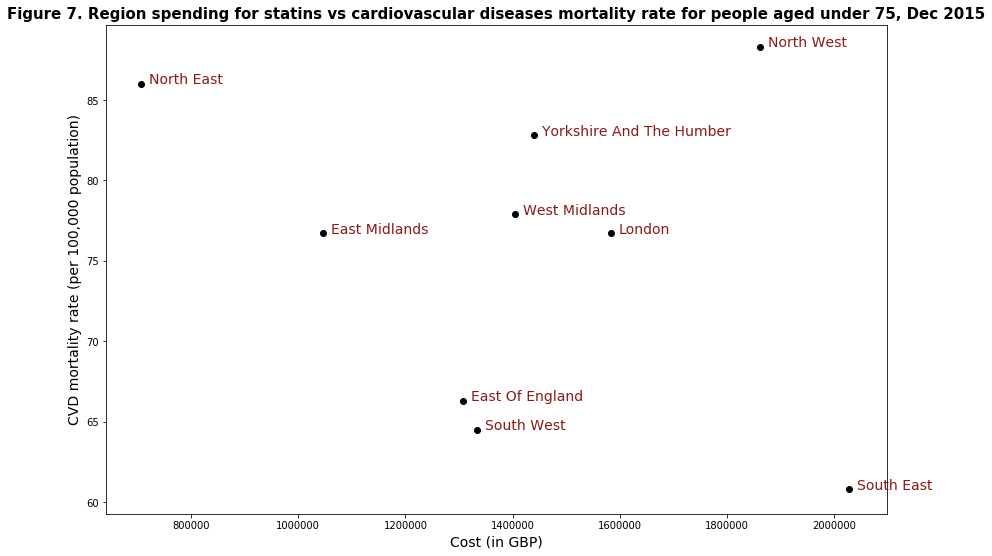

In [161]:
from matplotlib import pyplot as plt    
%matplotlib inline

# Initial setting for plotting
fig=plt.figure(figsize=(14, 9))
ax=fig.add_subplot(111)


# x-axis: region spending for statins
x1 = statin_cvd_region.act_cost
# y-axis: CVD mortality rate
y1 = statin_cvd_region.cardiac_indicator

# Series label
labels= statin_cvd_region.region_name.str.title()
# Markers (can be different if required)
s = ['o','o','o','o','o','o','o', 'o','o']

# Configurable offset for x position of text label
offset_xlabel = 15000

# Actual plot with corresponding labels using annotate
for x, y, marker, label in zip(x1, y1, s, labels):
    ax.scatter(x, y, c='k', marker=marker)
    ax.annotate(label, (x + offset_xlabel, y), fontsize=14, color='maroon', alpha= 0.9)

# Title and labels for axes:
plt.title("Figure 7. Region spending for statins vs cardiovascular diseases mortality rate for people aged under 75, Dec 2015",
          fontsize=15, fontweight='bold')
plt.xlabel("Cost (in GBP)", fontsize=14)
plt.ylabel("CVD mortality rate (per 100,000 population)", fontsize=14)

# Show plot
plt.show()

### C.5.3 Assesment of correlation between relative spending for statin prescriptions in each region and the mortality rate from cardiovascular diseases (median values)

#### C.5.3.1 Median values for the relative spending of statin prescriptions per region and CVD mortality rate

In [162]:
# Get median values of the relative spending for statin to make a fair comparison amongst English regions
statin_cvd_region_median = statin_cvd_gp.groupby(['region_code', 'region_name', 'cardiac_indicator'],
                                          as_index=False)['statin_cost_patient'].median()

# Show full table with relative spending for statin prescriptions per patient in each region- median values
statin_cvd_region_median

,region_code,region_name,cardiac_indicator,statin_cost_patient
0,e12000001,north east,86.0,0.261615
1,e12000002,north west,88.3,0.241497
2,e12000003,yorkshire and the humber,82.8,0.251455
3,e12000004,east midlands,76.7,0.203323
4,e12000005,west midlands,77.9,0.219644
5,e12000006,east of england,66.3,0.198147
6,e12000007,london,76.7,0.164926
7,e12000008,south east,60.8,0.211082
8,e12000009,south west,64.5,0.232025


#### C.5.3.2 Assessing the Pearson correlation coefficient

In [163]:
# Get the Pearson correlation coefficient 
statin_cvd_region_median['statin_cost_patient'].corr(statin_cvd_region_median['cardiac_indicator'])
# Result shows a low positive correlation according to interpreation criteria by Mukaka (2012) 

0.45160288856147274

## -----------------------------------------------------------------------------------------------------------

# Assignment D

Using the Google FluTrends surveillance data, pick two random countries, one in the Northern hemisphere and one in the Southern hemisphere. For each of country:<br>

** 1. Provide a visualisation of the seasonal patterns across all years. **<br>
Figure 8c [D.3.1] provides the Google flu search activity of New Zealand (NZ) and the Netherlands (NL) populations for 2006-2015. The seasonal trend has peaks that matches winter (NZ winter: Jun-Sept) and troughs that matches summer (NZ: Dec-Mar). Seasonality is roughly shifted by six months, as these two countries are in opposite hemispheres, presenting similar changes in the search activity. Fig. 9 summarises the data per month.<br>

** 2. Calculate the yearly minimum and maximum for each country. Provide and plot a reasonable mathematical function that could be used as an approximation for the seasonal trend for each country. ** <br>
Yearly minimum and maximum for New Zealand and the Netherlands are provided in table 12 [D.2.3], but can also be visualised in fig. 8a and fig. 8b. [D.3.1].<br>

In relation to the reasonable function, the first step was a decomposition of time series (Wikipedia, 2017) to get the seasonal component of the trend for each country. A basic decomposition (additive model) was obtained [D.4.1] as proposed by Brownlee (2017) and seasonal components are presented in fig. 10 [D.4.1.1]. <br>

Sinusoidal functions can be used (Edlund, 2011) as an approximation of seasonal forcing. Therefore, amplitudes were estimated as 46 (NZ) and 40 (NL), angular frequencies of 20pi, phases of –pi/2 & pi/2, and errors of 20 & 15. Fig. 11 [D.4.2] shows the sinusoidal function proposed and wave results. These trends may be simple yet comparable to fig. 10 in terms of beginning and end of time (dates vs weeks), google flu search activity (amplitude) and difference of seasons (phase). <br>


## D.1 Data preparation and cleansing


### D.1.1 Functions created

In [164]:
# **** Imported libraries
import pandas as pd
import numpy as np
import datetime as dt
from matplotlib import pyplot as plt    


# Note that F is an abbreviation for function:

# Function 1 (F1) retrieves data from Google Flu Trends Data
# It requires as an input a current url of interest
def google_flu_trends_data(current_url): 
    # Set header=8 (for extraction data), replace spaces between words with underscore and eliminate lateral
    # white spaces
    temp_flu_trends = pd.read_csv(current_url, sep=',', header=8).rename(columns=lambda x:\
                                                                         x.replace(" ","_").lower())
    # Convert date from "object" to "datetime" type
    temp_flu_trends['date'] = pd.to_datetime(temp_flu_trends['date'], errors='coerce')
    return temp_flu_trends


# Function 2 (F2) performs initial data exploration (display dataframe information, fist 5 rows of data
# and basic descriptive statistics for each variable)
# It requires as input a dataframe name
def basic_data_exploration (current_df):
    print 'Information about the data available in the', current_df.columns[1], 'dataframe:'
    print current_df.info()
    print
    print 'These are the first 5 rows of data:'
    print current_df.head()
    print
    print 'Basic descriptive statistics of the', current_df.columns[1], 'dataset:'
    print current_df.describe()
    print
    return

# Function 3 (F3) reports a summary of missignes in the data set either by showing the number of data missing or
# by displaying the number of data that exist per variable
# It requires as input a dataframe name
def missing_val (current_df):
    print 'Number of data unavailable:'
    print current_df.isnull().sum().count
    print
    print 'Number of non-zero values in the dataset'
    print current_df.count()
    return

# Function 4 (F4) creates a new dataframe with dates as index and add "different time formats" columns (as string)
# for future data processing/analysis
# It only requires to provide the name of the current dataframe
def t_series_preparation(current_df):
    temp_df = current_df.copy(deep=True)
    temp_df['date_text'] = temp_df['date'].dt.strftime('%Y%m%d') 
    temp_df['year'] = temp_df.date.dt.year
    temp_df['monh'] = temp_df.date.dt.month
    temp_df['week'] = temp_df.date.dt.week
    
    temp_df['ordinal_t'] = temp_df['date'].map(dt.datetime.toordinal)

    temp_df.set_index(temp_df['date'], inplace = True)
    temp_df = temp_df.drop('date', axis = 1)
    return temp_df

# Function 5 (F5) gets the local maximum value per year
# Input requires a dataframe and the country of interest
def get_peak_values(current_df, country):
    temp_max = current_df.loc[current_df.groupby('year')[country].idxmax()].copy(deep=True)
    temp_max.reset_index(inplace=True)
    return temp_max 

# Function 6 (F6) gets the local minimum value per year
# Input requires a dataframe and the country of interest
def get_valley_values(current_df, country):
    temp_max = current_df.loc[current_df.groupby('year')[country].idxmin()].copy(deep=True)
    temp_max.reset_index(inplace=True)
    return temp_max 

# Funtion 7 (F7) finds the first data point to be plotted (time as reference) between 2 countries
# It requires the name of the dataframes
def start_row(current_df1, current_df2):
    # Index for the first non-NA/null value available in the dataset:
    first_index_current_df1 = current_df1.first_valid_index()
    first_index_current_df2 = current_df2.first_valid_index()  
    # Find the first maximum index value
    if first_index_current_df1 > first_index_current_df2:
        first_row = first_index_current_df1
        print 'First date to be use is from the', current_df1.columns[0], 'data set:', start_row
    else:
        first_row = first_index_current_df2
        print 'First date to be use is from the', current_df2.columns[0], 'data set:', start_row
    return first_row

# Function 8 (F8) creates a label for max or min values in a plot
# Input requires:
# offset, a distance value for the label text 
# n, parameter use as index for the label
# temp_df, a dataframe
# country, the country name
# alpha, 
def generate_potential_labels(offset, n, temp_dt, country, alpha):
    if n > 0:
        for index, row in temp_dt.iterrows(): 
            x_position = str(temp_dt.loc[index]['date_text'])
            y_position = str(temp_dt.loc[index][country])
            y_offset_position = str(temp_dt.loc[index][country] + offset)
            print "ax"+ str(n) + ".annotate('" + y_position + "', xy=('" + x_position +\
                    "'," + y_position + "), xytext=('" + x_position +\
                    "', (" + y_offset_position + "))," + "arrowprops=dict(arrowstyle='-|>',\
                    connectionstyle='angle3,angleA=0,angleB=90', alpha=" + str(alpha) + "))"
    elif n == 0:
        for index, row in temp_dt.iterrows(): 
            x_position = str(temp_dt.loc[index]['date_text'])
            y_position = str(temp_dt.loc[index][country])
            y_offset_position = str(temp_dt.loc[index][country] + offset)
            print "ax" + ".annotate('" + y_position + "', xy=('" + x_position +\
                    "'," + y_position + "), xytext=('" + x_position +\
                    "', (" + y_offset_position + "))," + "arrowprops=dict(arrowstyle='-|>',\
                    connectionstyle='angle3,angleA=0,angleB=90', alpha=" + str(alpha) + "))"
    else:
        print 'n must 0 or a positive number, please try again'    
    return 

# Function 8.2 improvement of F8, for annotatetions automatically - not in use due to the 
# need of manual adjustments.
def generate_potential_labels_upadate(ax, offset, temp_dt, country, alpha):
    for index, row in temp_dt.iterrows(): 
        x_position = temp_dt.loc[index]['date_text']
        y_position = temp_dt.loc[index][country]
        y_offset_position = temp_dt.loc[index][country] + offset
        ax.annotate(str(y_position), xy=(str(x_position), y_position), xytext=(str(x_position),
                    (y_offset_position)),arrowprops=dict(arrowstyle='-|>',
                    connectionstyle='angle3,angleA=0,angleB=90', alpha=alpha))





### D.1.2 Retrieve full dataset from Google Flu Trends and create a dataframe per country, New Zealand and Netherlands

In [165]:
# List of countries (URLs) to be retrieved
nz_url = 'https://www.google.org/flutrends/about/data/flu/nz/data.txt' # New Zeland URL
nl_url = 'https://www.google.org/flutrends/about/data/flu/nl/data.txt' # Netherlands

In [166]:
# Get data into a dataframe
nz_flu_trends = google_flu_trends_data(nz_url) # New Zealand
nl_flu_trends = google_flu_trends_data(nl_url) # Neatherlands

### D.1.3 Initial data exploration per country

#### D.1.3.1 New Zealand

In [167]:
# Perform data exploration for New Zealand
exploratory_nz = basic_data_exploration(nz_flu_trends) # Function (F2) details in D.1.1

Information about the data available in the new_zealand dataframe:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 502 entries, 0 to 501
Data columns (total 4 columns):
date            502 non-null datetime64[ns]
new_zealand     502 non-null int64
north_island    502 non-null int64
south_island    500 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 15.8 KB
None

These are the first 5 rows of data:
        date  new_zealand  north_island  south_island
0 2006-01-01           17            15           NaN
1 2006-01-08           10            10           NaN
2 2006-01-15           11            11          12.0
3 2006-01-22            8             8           9.0
4 2006-01-29            8            10           7.0

Basic descriptive statistics of the new_zealand dataset:
       new_zealand  north_island  south_island
count   502.000000    502.000000    500.000000
mean     39.033865     37.169323     48.728000
std      38.328406     36.202320     55.763

#### D.1.3.2 Netherlands

In [168]:
# Perfom data exploration Netherlands
exploratory_nl = basic_data_exploration(nl_flu_trends) # Function (F2) details in D.1.1

Information about the data available in the netherlands dataframe:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 619 entries, 0 to 618
Data columns (total 15 columns):
date                 619 non-null datetime64[ns]
netherlands          619 non-null int64
friesland            457 non-null float64
gelderland           562 non-null float64
groningen            462 non-null float64
limburg              465 non-null float64
noord-brabant        560 non-null float64
noord-holland        614 non-null float64
overijssel           512 non-null float64
utrecht              610 non-null float64
zuid-holland         612 non-null float64
netherlands_north    513 non-null float64
netherlands_east     610 non-null float64
netherlands_west     618 non-null float64
netherlands_south    567 non-null float64
dtypes: datetime64[ns](1), float64(13), int64(1)
memory usage: 72.6 KB
None

These are the first 5 rows of data:
        date  netherlands  friesland  gelderland  groningen  limburg  \
0 2003-1

### D.1.4 Dealing with missing data:


In [169]:
# ***** Comment ****
# In New Zealand, less than 1% (2/507) of data were missing in South Island whereas data in the Netherlands presented
# (nearly or) more than 20% of missingness in several cities, with the highest percentage in Friesland (162/619),
# Groningen (157/619) and Limburg (154/619). At the national level both countries were free of missing data: 
# New Zealand, 502/502 and the Netherlands (619/619). So, the case of Netherlands, I decided to work, if required,
# only with cities that had less than 10% of missing data (< 62/619). That left out 5 cities in total. In D.1.41 and 
# D.1.4.2 can be seen full pattern of missingness. No attempts for imputation were done.

#### D.1.4.1 New Zealand

In [170]:
# Missing values in the New Zealand dataset
# Results shows only 2 of 502 data missing in South Island
nz_misisig_report = missing_val(nz_flu_trends) # Function (F3) details in D.1.1

Number of data unavailable:
<bound method Series.count of date            0
new_zealand     0
north_island    0
south_island    2
dtype: int64>

Number of non-zero values in the dataset
date            502
new_zealand     502
north_island    502
south_island    500
dtype: int64


#### D.1.4.2 Neatherlands

In [171]:
# Missing values in the Neatherlands dataset
# Results shows siginificant proportion of data missing in the Netherlands dataset
nl_misisig_report = missing_val(nl_flu_trends) # Function (F3) details in D.1.1

Number of data unavailable:
<bound method Series.count of date                   0
netherlands            0
friesland            162
gelderland            57
groningen            157
limburg              154
noord-brabant         59
noord-holland          5
overijssel           107
utrecht                9
zuid-holland           7
netherlands_north    106
netherlands_east       9
netherlands_west       1
netherlands_south     52
dtype: int64>

Number of non-zero values in the dataset
date                 619
netherlands          619
friesland            457
gelderland           562
groningen            462
limburg              465
noord-brabant        560
noord-holland        614
overijssel           512
utrecht              610
zuid-holland         612
netherlands_north    513
netherlands_east     610
netherlands_west     618
netherlands_south    567
dtype: int64


### D.1.5 Further data preparation for analysis

In [172]:
# Perform some data preparation for analysis - create new columns: full date as string, year, month and week
# New Zealand
nz_flu = t_series_preparation(nz_flu_trends) # Function (F4) details in D.1.1
# Netherlands
nl_flu = t_series_preparation(nl_flu_trends) # Function (F4) details in D.1.1

In [173]:
nz_flu.head(5)

,new_zealand,north_island,south_island,date_text,year,monh,week,ordinal_t
date,,,,,,,,
2006-01-01,17,15,NaN,20060101,2006,1,52,732312
2006-01-08,10,10,NaN,20060108,2006,1,1,732319
2006-01-15,11,11,12.0,20060115,2006,1,2,732326
2006-01-22,8,8,9.0,20060122,2006,1,3,732333
2006-01-29,8,10,7.0,20060129,2006,1,4,732340


In [174]:
nl_flu.head(5)

,netherlands,friesland,gelderland,groningen,limburg,noord-brabant,noord-holland,overijssel,utrecht,zuid-holland,netherlands_north,netherlands_east,netherlands_west,netherlands_south,date_text,year,monh,week,ordinal_t
date,,,,,,,,,,,,,,,,,,,
2003-10-05,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20031005,2003,10,40,731493
2003-10-12,22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.0,NaN,20031012,2003,10,41,731500
2003-10-19,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,NaN,20031019,2003,10,42,731507
2003-10-26,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.0,NaN,20031026,2003,10,43,731514
2003-11-02,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,NaN,20031102,2003,11,44,731521


## D.2 Calculate the yearly minimum and maximum for each country

### D.2.1 Maximum and minimum search flu activity per year, New Zealand

In [175]:
# Get the maximum search flu trends values 
max_nz = get_peak_values(nz_flu, 'new_zealand') # Function (F4) details in D.1.1
max_google_search_nz = max_nz[['year', 'new_zealand']]

# Get the minimum search flu trends values 
min_nz = get_valley_values(nz_flu, 'new_zealand') # Function (F6) details in D.1.1
min_google_search_nz = min_nz[['year', 'new_zealand']]

In [176]:
# Full table with maximum and minimum values per year - New Zealand
# Merge dataframes by inner method (default)
table_max_min_nz = pd.merge(max_google_search_nz,
                    min_google_search_nz,
                    on="year")
table_max_min_nz = table_max_min_nz.rename(index=str, columns={'new_zealand_x':'new_zealand_max', 'new_zealand_y':\
                                                               'new_zealand_min'})
table_max_min_nz

,year,new_zealand_max,new_zealand_min
0,2006,102,6
1,2007,87,3
2,2008,121,7
3,2009,266,6
4,2010,130,8
5,2011,82,9
6,2012,148,10
7,2013,123,10
8,2014,202,10
9,2015,57,11


In [177]:
# Minimum mean, standard deviation and global minimum
min_nz.new_zealand.mean(), min_nz.new_zealand.std(), min_nz.new_zealand.min()

(8.0, 2.494438257849294, 3)

In [178]:
# Maximun mean, standard deviation and global maximun
max_nz.new_zealand.mean(), max_nz.new_zealand.std(), max_nz.new_zealand.min()

(131.8, 61.79500159577813, 57)

### D.2.2 Maximum and minimum search flu activity per year, Netherlands

In [179]:
# Get the maximum search flu trends values per year
max_nl = get_peak_values(nl_flu, 'netherlands') # Function (F5) details in D.1.1
max_google_search_nl= max_nl[['year', 'netherlands']]

# Get the minimum search flu trends values per year
min_nl = get_valley_values(nl_flu, 'netherlands') # # Function (F6) details in D.1.1
min_google_search_nl = min_nl[['year', 'netherlands']]

In [180]:
# Full table with maximum and mimimum values per year - Netherlands
# Merge dataframes by inner method (default)
table_max_min_nl = pd.merge(max_google_search_nl,
                    min_google_search_nl,
                    on="year")
table_max_min_nl = table_max_min_nl.rename(index=str, columns={'netherlands_x':'netherlands_max', 'netherlands_y':\
                                                               'netherlands_min'})
table_max_min_nl

,year,netherlands_max,netherlands_min
0,2003,177,18
1,2004,58,10
2,2005,140,12
3,2006,72,13
4,2007,97,12
5,2008,89,11
6,2009,199,14
7,2010,67,10
8,2011,107,10
9,2012,134,14


In [181]:
# Maximun mean, standard deviation and global maximun
max_nl.netherlands.mean(), max_nl.netherlands.std(), max_nl.netherlands.max()

(130.23076923076923, 63.29185551363599, 270)

In [182]:
# Minimum mean, standard deviation and global minimum
min_nl.netherlands.mean(), min_nl.netherlands.std(), min_nl.netherlands.min()

(12.615384615384615, 2.292686253374032, 10)

### D.2.3 Table 12 - Maximum and minimum Google search flu activity per year, New Zealand and the Netherlands 2006-2015

In [183]:
# Full table with maximum and mimimum values per year - Netherlands
# Merge by using same identifier in both dataframe
table_max_min_both_countries = pd.merge(table_max_min_nz,  
                    table_max_min_nl,
                    on='year')

table_max_min_both_countries

# *** Maximum values can be shown first for both countries and the minimums 
# (however they are not necessarily comparable). The code below shows that table (uncomment if required) ***
# table_max_min_both_countries[['new_zealand_max', 'netherlands_max', 'new_zealand_min', 'netherlands_min']]

,year,new_zealand_max,new_zealand_min,netherlands_max,netherlands_min
0,2006,102,6,72,13
1,2007,87,3,97,12
2,2008,121,7,89,11
3,2009,266,6,199,14
4,2010,130,8,67,10
5,2011,82,9,107,10
6,2012,148,10,134,14
7,2013,123,10,270,15
8,2014,202,10,90,13
9,2015,57,11,193,12


## D.3 Provide a visualisation of the seasonal patterns across all years


### D.3.1 Plot preparation

In [184]:
#Get the date for the first data available between both countries
first_date = start_row(nl_flu, nz_flu) # Function (F7) details in D.1.1
first_date

First date to be use is from the new_zealand data set: <function start_row at 0x229b81aa0>


Timestamp('2006-01-01 00:00:00')

In [185]:
# This code was used for generating the initial annotatetions. However, for readability, 
# positions label positions were readjusted manually.

# Get labels:
# max_labels_nz = generate_potential_labels (25, 1, max_nz, 'new_zealand', 0.7 ) # Function (F5) details in D.1.1
# min_labels_nz = generate_potential_labels (25, 1, min_nz, 'new_zealand', 0.7 ) # Function (F5) details in D.1.1
# max_labels_nl = generate_potential_labels (25, 2, max_nl, 'netherlands', 0.7 ) # Function (F5) details in D.1.1
# min_labels_nl = generate_potential_labels (25, 1, min_nl, 'netherlands', 0.7 ) # Function (F5) details in D.1.1

### D.3.2 Google flu search seasonal activity at national level, New Zealand and the Netherlands 2006-2015.

#### D.3.1 Visualization - Google flu search seasonal activity at national level, New Zealand and the Netherlands 2006-2015

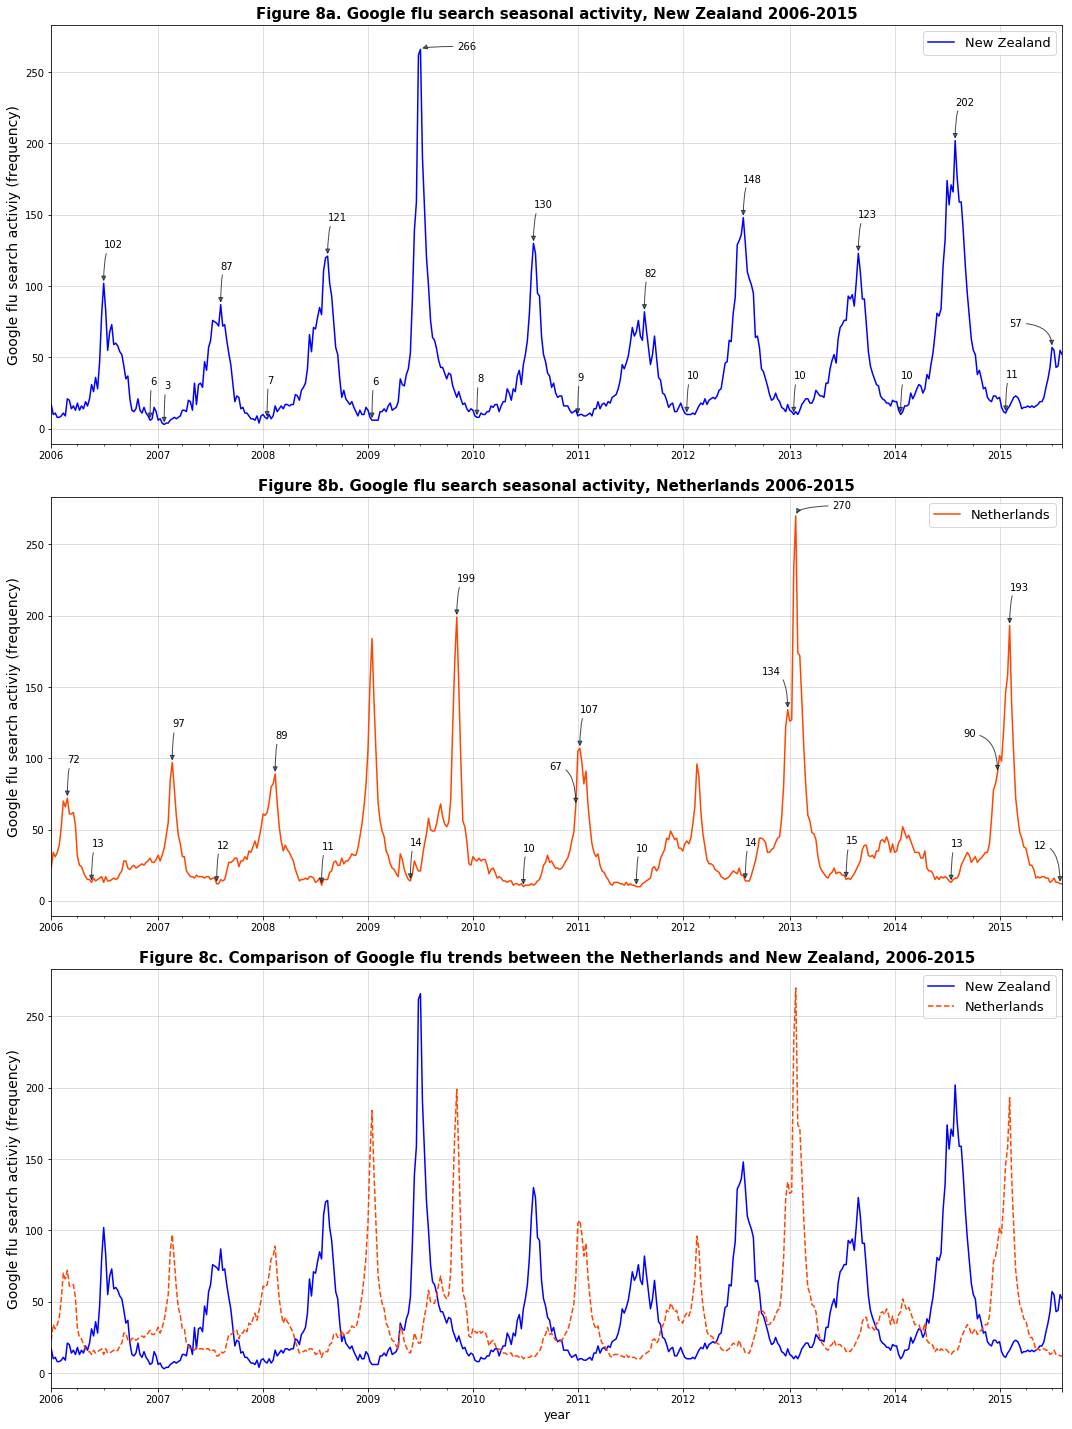

In [186]:
import matplotlib.pyplot as plt
%matplotlib inline

# Seeting up:
fig, (ax1, ax2, ax3) = plt.subplots(3, ncols=1, sharex=False, sharey=True, figsize=(15,20))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=1)

# Turn grids for reference:
ax1.grid(which='major', alpha=0.5)
ax2.grid(which='major', alpha=0.5)
ax3.grid(which='major', alpha=0.5)


# *** Plots: ***
a1 = nz_flu.new_zealand.plot(legend ='left', ax=ax1, color='blue',grid=True, style=['-'])
a2 = nl_flu.netherlands[first_date:].plot(legend ='left', ax=ax2, color='orangered', grid=True, style=['-'])
a3 = nz_flu.new_zealand.plot(legend ='left', ax=ax3, color='blue',grid=True, style=['-'])
a4 = nl_flu.netherlands[first_date:].plot(legend ='left', ax=ax3, color='orangered', grid=True, style=['--'])
# **************

# Add titles:
ax1.set_title('Figure 8a. Google flu search seasonal activity, New Zealand 2006-2015', fontsize=15, fontweight='bold')
ax2.set_title("Figure 8b. Google flu search seasonal activity, Netherlands 2006-2015", fontsize=15, fontweight='bold')
ax3.set_title("Figure 8c. Comparison of Google flu trends between the Netherlands and New Zealand, 2006-2015", fontsize=15, fontweight='bold')

# Turn off x-axe label
ax1.set_xlabel('')
ax2.set_xlabel('')
ax3.set_xlabel('year', fontsize=12)
# Label y-axe
ax1.set_ylabel('Google flu search activiy (frequency)', fontsize=14)
ax2.set_ylabel('Google flu search activiy (frequency)', fontsize=14)
ax3.set_ylabel('Google flu search activiy (frequency)', fontsize=14)

# Legends:
ax1.legend(['New Zealand'], fontsize=13);
ax2.legend(['Netherlands'], fontsize=13);
ax3.legend(['New Zealand', 'Netherlands'], fontsize=13)



# Max labels - New Zealand
ax1.annotate('102', xy=('20060702',102), xytext=('20060702', (127)),arrowprops=dict(arrowstyle='-|>', connectionstyle='angle3,angleA=0,angleB=90', alpha=0.7))
ax1.annotate('87', xy=('20070812',87), xytext=('20070812', (112)),arrowprops=dict(arrowstyle='-|>', connectionstyle='angle3,angleA=0,angleB=90', alpha=0.7))
ax1.annotate('121', xy=('20080817',121), xytext=('20080817', (146)),arrowprops=dict(arrowstyle='-|>', connectionstyle='angle3,angleA=0,angleB=90', alpha=0.7))
ax1.annotate('266', xy=('20090705',266), xytext=('20091105', (266)),arrowprops=dict(arrowstyle='-|>', connectionstyle='angle3,angleA=0,angleB=90', alpha=0.7))
ax1.annotate('130', xy=('20100801',130), xytext=('20100801', (155)),arrowprops=dict(arrowstyle='-|>', connectionstyle='angle3,angleA=0,angleB=90', alpha=0.7))
ax1.annotate('82', xy=('20110821',82), xytext=('20110821', (107)),arrowprops=dict(arrowstyle='-|>', connectionstyle='angle3,angleA=0,angleB=90', alpha=0.7))
ax1.annotate('148', xy=('20120729',148), xytext=('20120729', (173)),arrowprops=dict(arrowstyle='-|>', connectionstyle='angle3,angleA=0,angleB=90', alpha=0.7))
ax1.annotate('123', xy=('20130901',123), xytext=('20130901', (148)),arrowprops=dict(arrowstyle='-|>', connectionstyle='angle3,angleA=0,angleB=90', alpha=0.7))
ax1.annotate('202', xy=('20140803',202), xytext=('20140803', (227)),arrowprops=dict(arrowstyle='-|>', connectionstyle='angle3,angleA=0,angleB=90', alpha=0.7))
ax1.annotate('57', xy=('20150705',57), xytext=('20150205', (72)),arrowprops=dict(arrowstyle='-|>', connectionstyle='angle3,angleA=0,angleB=90', alpha=0.7))

# Min labels - New zealand
ax1.annotate('6', xy=('20061210',6), xytext=('20061210', (31)),arrowprops=dict(arrowstyle='-|>', connectionstyle='angle3,angleA=0,angleB=90', alpha=0.7))
ax1.annotate('3', xy=('20070128',3), xytext=('20070128', (28)),arrowprops=dict(arrowstyle='-|>', connectionstyle='angle3,angleA=0,angleB=90', alpha=0.7))
ax1.annotate('7', xy=('20080120',7), xytext=('20080120', (32)),arrowprops=dict(arrowstyle='-|>', connectionstyle='angle3,angleA=0,angleB=90', alpha=0.7))
ax1.annotate('6', xy=('20090118',6), xytext=('20090118', (31)),arrowprops=dict(arrowstyle='-|>', connectionstyle='angle3,angleA=0,angleB=90', alpha=0.7))
ax1.annotate('8', xy=('20100117',8), xytext=('20100117', (33)),arrowprops=dict(arrowstyle='-|>', connectionstyle='angle3,angleA=0,angleB=90', alpha=0.7))
ax1.annotate('9', xy=('20110102',9), xytext=('20110102', (34)),arrowprops=dict(arrowstyle='-|>', connectionstyle='angle3,angleA=0,angleB=90', alpha=0.7))
ax1.annotate('10', xy=('20120115',10), xytext=('20120115', (35)),arrowprops=dict(arrowstyle='-|>', connectionstyle='angle3,angleA=0,angleB=90', alpha=0.7))
ax1.annotate('10', xy=('20130120',10), xytext=('20130120', (35)),arrowprops=dict(arrowstyle='-|>', connectionstyle='angle3,angleA=0,angleB=90', alpha=0.7))
ax1.annotate('10', xy=('20140126',10), xytext=('20140126', (35)),arrowprops=dict(arrowstyle='-|>', connectionstyle='angle3,angleA=0,angleB=90', alpha=0.7))
ax1.annotate('11', xy=('20150125',11), xytext=('20150125', (36)),arrowprops=dict(arrowstyle='-|>', connectionstyle='angle3,angleA=0,angleB=90', alpha=0.7))

# Neatherlands max labels
ax2.annotate('72', xy=('20060226',72), xytext=('20060226', (97)),arrowprops=dict(arrowstyle='-|>', connectionstyle='angle3,angleA=0,angleB=90', alpha=0.7))
ax2.annotate('97', xy=('20070225',97), xytext=('20070225', (122)),arrowprops=dict(arrowstyle='-|>', connectionstyle='angle3,angleA=0,angleB=90', alpha=0.7))
ax2.annotate('89', xy=('20080217',89), xytext=('20080217', (114)),arrowprops=dict(arrowstyle='-|>', connectionstyle='angle3,angleA=0,angleB=90', alpha=0.7))
ax2.annotate('199', xy=('20091108',199), xytext=('20091108', (224)),arrowprops=dict(arrowstyle='-|>', connectionstyle='angle3,angleA=0,angleB=90', alpha=0.7))
ax2.annotate('67', xy=('20101226',67), xytext=('20100926', (92)),arrowprops=dict(arrowstyle='-|>', connectionstyle='angle3,angleA=0,angleB=90', alpha=0.7))
ax2.annotate('107', xy=('20110109',107), xytext=('20110109', (132)),arrowprops=dict(arrowstyle='-|>', connectionstyle='angle3,angleA=0,angleB=90', alpha=0.7))
ax2.annotate('134', xy=('20121230',134), xytext=('20120930', (159)),arrowprops=dict(arrowstyle='-|>', connectionstyle='angle3,angleA=0,angleB=90', alpha=0.7))
ax2.annotate('270', xy=('20130127',270), xytext=('20130527', (275)),arrowprops=dict(arrowstyle='-|>', connectionstyle='angle3,angleA=0,angleB=90', alpha=0.7))
ax2.annotate('90', xy=('20141228',90), xytext=('20140828', (115)),arrowprops=dict(arrowstyle='-|>', connectionstyle='angle3,angleA=0,angleB=90', alpha=0.7))
ax2.annotate('193', xy=('20150208',193), xytext=('20150208', (218)),arrowprops=dict(arrowstyle='-|>', connectionstyle='angle3,angleA=0,angleB=90', alpha=0.7))

# Neatherlands min labels
ax2.annotate('13', xy=('20060521',13), xytext=('20060521', (38)),arrowprops=dict(arrowstyle='-|>', connectionstyle='angle3,angleA=0,angleB=90', alpha=0.7))
ax2.annotate('12', xy=('20070729',12), xytext=('20070729', (37)),arrowprops=dict(arrowstyle='-|>', connectionstyle='angle3,angleA=0,angleB=90', alpha=0.7))
ax2.annotate('11', xy=('20080727',11), xytext=('20080727', (36)),arrowprops=dict(arrowstyle='-|>', connectionstyle='angle3,angleA=0,angleB=90', alpha=0.7))
ax2.annotate('14', xy=('20090531',14), xytext=('20090531', (39)),arrowprops=dict(arrowstyle='-|>', connectionstyle='angle3,angleA=0,angleB=90', alpha=0.7))
ax2.annotate('10', xy=('20100627',10), xytext=('20100627', (35)),arrowprops=dict(arrowstyle='-|>', connectionstyle='angle3,angleA=0,angleB=90', alpha=0.7))
ax2.annotate('10', xy=('20110724',10), xytext=('20110724', (35)),arrowprops=dict(arrowstyle='-|>', connectionstyle='angle3,angleA=0,angleB=90', alpha=0.7))
ax2.annotate('14', xy=('20120805',14), xytext=('20120805', (39)),arrowprops=dict(arrowstyle='-|>', connectionstyle='angle3,angleA=0,angleB=90', alpha=0.7))
ax2.annotate('15', xy=('20130721',15), xytext=('20130721', (40)),arrowprops=dict(arrowstyle='-|>', connectionstyle='angle3,angleA=0,angleB=90', alpha=0.7))
ax2.annotate('13', xy=('20140720',13), xytext=('20140720', (38)),arrowprops=dict(arrowstyle='-|>', connectionstyle='angle3,angleA=0,angleB=90', alpha=0.7))
ax2.annotate('12', xy=('20150802',12), xytext=('20150502', (37)),arrowprops=dict(arrowstyle='-|>', connectionstyle='angle3,angleA=0,angleB=90', alpha=0.7))

# Tight_layout() to avoid weird overlaps
plt.tight_layout()

# Show plot
plt.show()

#### D.3.2 Closer visualization - Google flu trends between New Zealand and the Netherlands, mean values per month

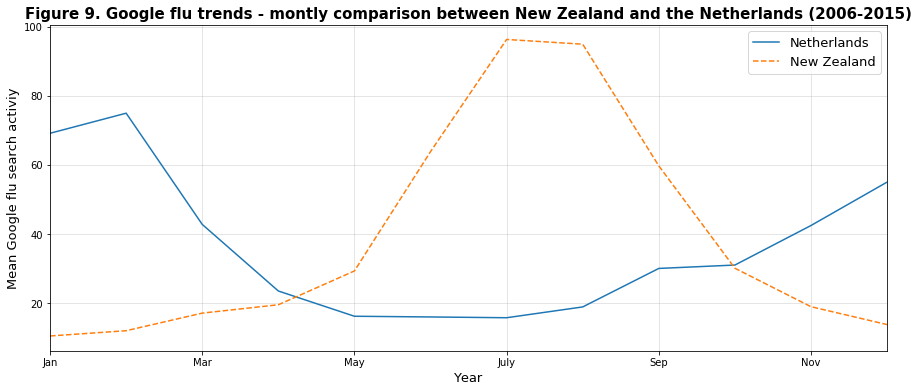

In [187]:
from matplotlib import pyplot as plt    
%matplotlib inline

fig = plt.figure(figsize=(15, 6))

# List of months
by_month = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Group the data by month
by_month_netherlands = nl_flu.netherlands.groupby(nl_flu.netherlands.index.month).mean()
by_month_netherlands.index = [by_month]
# Plot the Netherlands behaviuor
ax = by_month_netherlands.plot(legend ='left',style=['-'])

# Group the data by month
by_month_nz = nz_flu.new_zealand.groupby(nz_flu.new_zealand.index.month).mean()
by_month_nz.index = [by_month]
# Plot the New Zealand behaviuor
ax = by_month_nz.plot(legend ='left',style=['--'])

# Title
ax.set_title('Figure 9. Google flu trends - montly comparison between New Zealand and the Netherlands (2006-2015)',\
             fontsize=15, fontweight='bold')
# Label x-axe
ax.set_xlabel('Year', fontsize=13)
# Label y-axe
ax.set_ylabel('Mean Google flu search activiy', fontsize=13)

# Legends:
ax.legend(['Netherlands', 'New Zealand'], fontsize=13)

# Softer grids
ax.grid(alpha=0.4)

#fig.savefig('google_moth.jpg')
plt.show()

#### D.3.3 Alternative visualisation - Google flu search seasonal activity at national and regional/state level, New Zealand and the Netherlands (2006-2015)

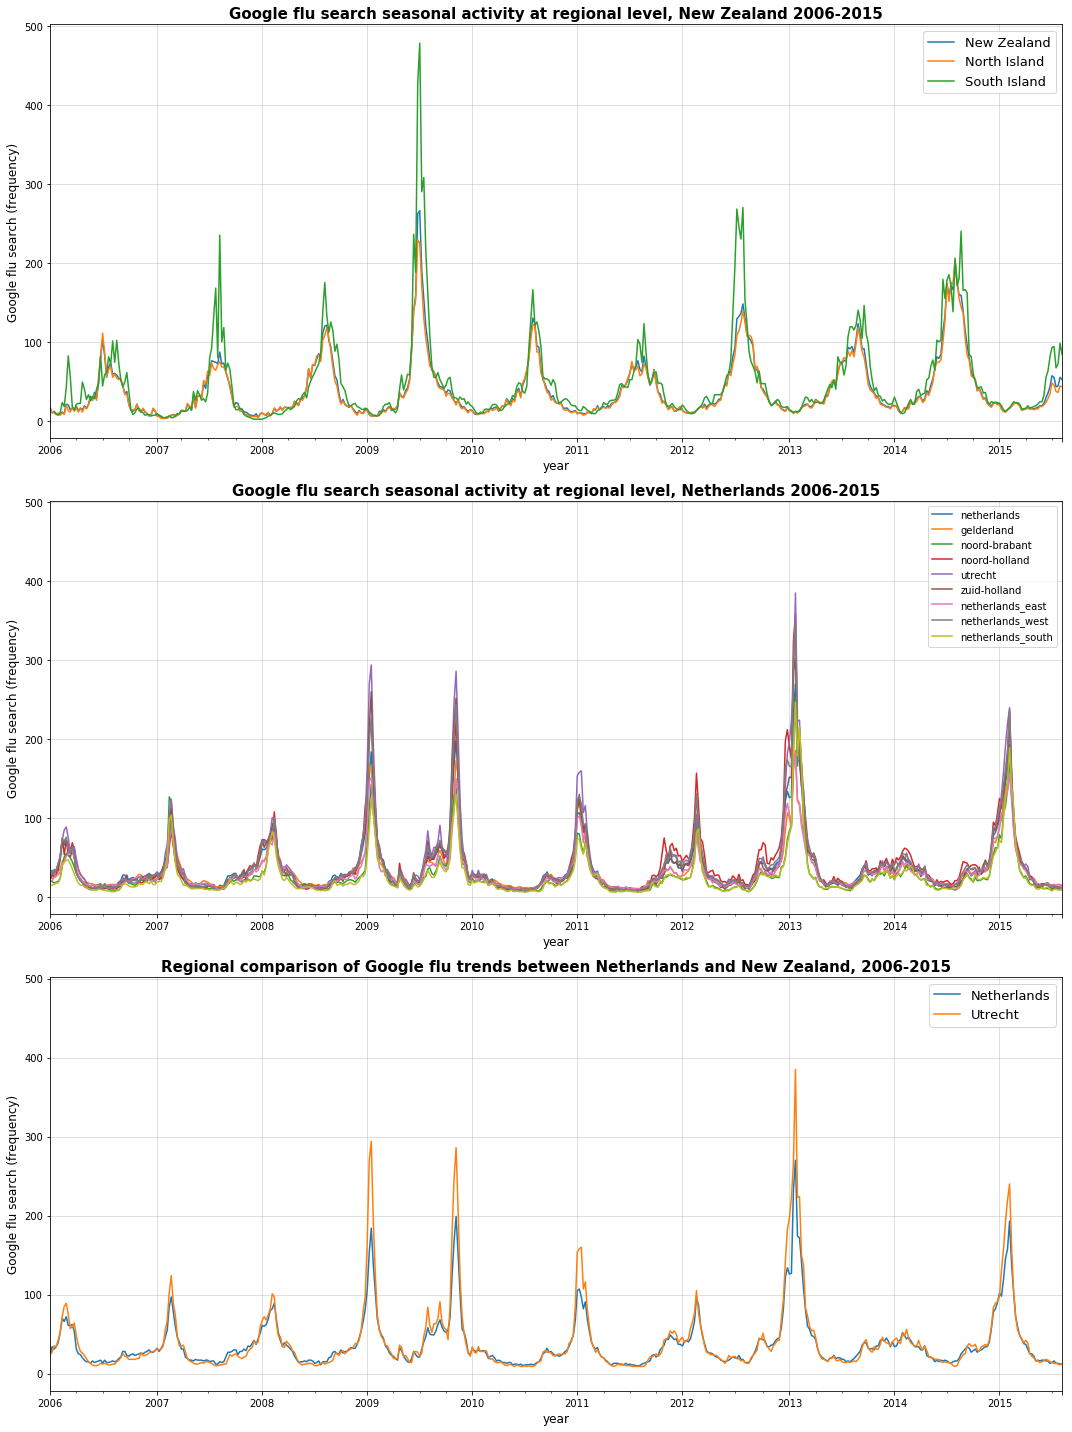

In [188]:
import matplotlib.pyplot as plt
%matplotlib inline

# Results in this plot can be complex to understand (excluded from the report) but it shows the Google
# flue trends within countries

# Seeting up:
fig, (ax1, ax2, ax3) = plt.subplots(3, ncols=1, sharex=False, sharey=True, figsize=(15,20))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=1)


#Make a Netherlands available from 20016 (for comparison) - alternative to D.3.1 (a1)
nl_flu_from_2006 = nl_flu.copy(deep=True)
nl_flu_from_2006 = nl_flu_from_2006.loc[nl_flu_from_2006.index.year >= 2006]


# Actual plots:
# New Zealand:
regions_nz = ['new_zealand', 'north_island', 'south_island']
a1 = nz_flu[regions_nz].plot(legend ='left', ax=ax1, grid=True, style=['-'])
# Netherlands
regions_nl = ['netherlands', 'gelderland', 'noord-brabant', 'noord-holland', 'utrecht', 'zuid-holland',\
              'netherlands_east', 'netherlands_west', 'netherlands_south']
a2 = nl_flu_from_2006[regions_nl].plot(legend ='left', ax=ax2, grid=True, style=['-'])
region_utrecht = ['netherlands', 'utrecht']
a3 = nl_flu_from_2006[region_utrecht].plot(legend ='left', ax=ax3, grid=True, style=['-'])

# Add titles:
ax1.set_title('Google flu search seasonal activity at regional level, New Zealand 2006-2015', fontsize=15, fontweight='bold')
ax2.set_title("Google flu search seasonal activity at regional level, Netherlands 2006-2015", fontsize=15, fontweight='bold')
ax3.set_title("Regional comparison of Google flu trends between Netherlands and New Zealand, 2006-2015", fontsize=15,\
              fontweight='bold')

# Turn off x-axe label
ax1.set_xlabel('year', fontsize=12) 
ax2.set_xlabel('year', fontsize=12)
ax3.set_xlabel('year', fontsize=12)
# Label y-axe
ax1.set_ylabel('Google flu search (frequency)', fontsize=12)
ax2.set_ylabel('Google flu search (frequency)', fontsize=12)
ax3.set_ylabel('Google flu search (frequency)', fontsize=12)

#Legends:
ax1.legend(['New Zealand', 'North Island', 'South Island'], fontsize=13);
ax3.legend(['Netherlands', 'Utrecht'], fontsize=13);

# Softer grids 
ax1.grid(which='major', alpha=0.5)
ax2.grid(which='major', alpha=0.5)
ax3.grid(which='major', alpha=0.5)

# Keep it tight
plt.tight_layout()

plt.show()

## D.4 Mathematical function 


### D.4.1 Wave decomposition of the Google flu trends wave, New Zealand and the Netherlands 2006-2015

/Users/juan/anaconda2/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


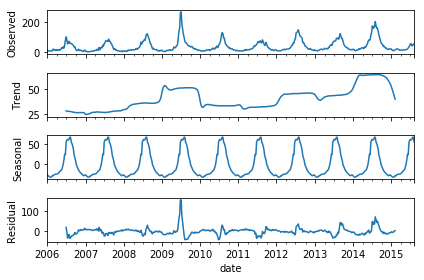

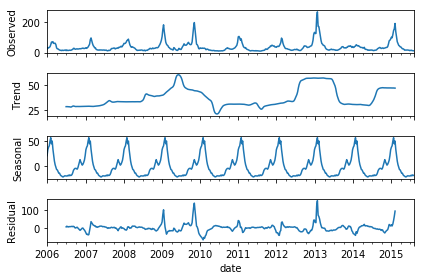

In [189]:
# Code implemented as suggested by Jason Brownlee in Time Series (https://machinelearningmastery.com/decompose-time-series-data-trend-seasonality/)
from statsmodels.tsa.seasonal import seasonal_decompose
from matplotlib import pyplot
%matplotlib inline

fig = plt.figure()


# Decomposition using an additive model
wave_decomposition_nz = seasonal_decompose(nz_flu.new_zealand, model='additive')
wave_decomposition_nl = seasonal_decompose(nl_flu_from_2006.netherlands, model='additive')

wave_decomposition_nz.plot()
wave_decomposition_nl.plot()

# print(result.trend)
# print(result.seasonal)
# print(result.resid)
# print(result.observed)
# result.seasonal.plot(figsize=(10, 6))

plt.show()

#### D.4.1.1 Visualisation of the seasonal component of the Google flue trends, New Zealand vs Netherlands, 2006-2015

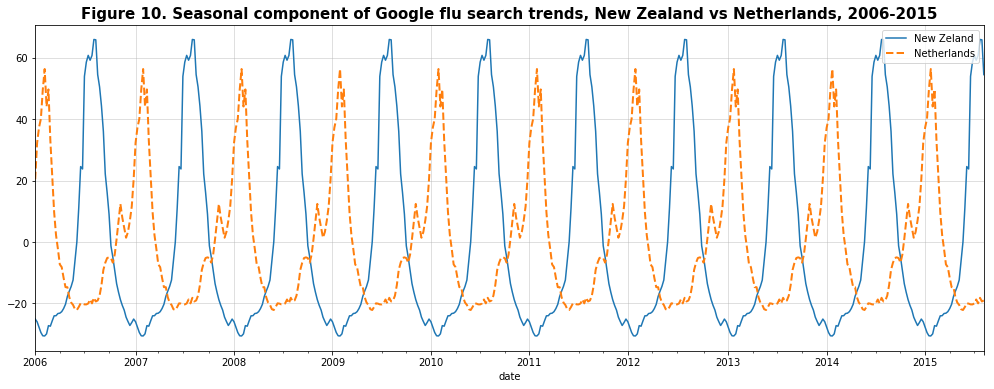

In [190]:
from matplotlib import pyplot as plt    
%matplotlib inline

# Initialise a figure
fig = plt.figure()

# Plot cyclical component:
x = wave_decomposition_nz.seasonal.plot(legend=True, label='New Zeland', grid=True, figsize=(17, 6))
ax = wave_decomposition_nl.seasonal.plot(legend=True, label='Netherlands',grid= True, figsize=(17, 6), style=['--'], linewidth=2)

# Set title
ax.set_title('Figure 10. Seasonal component of Google flu search trends, New Zealand vs Netherlands, 2006-2015', fontsize=15, fontweight='bold')

# Grids
ax.grid(True, which='major', alpha=0.5)

# Show plot
plt.show()

### D.4.2 Basic mathematical function and plot that could be used as an approximation of the seasonal Google flu trend component for New Zealand and the Netherlands

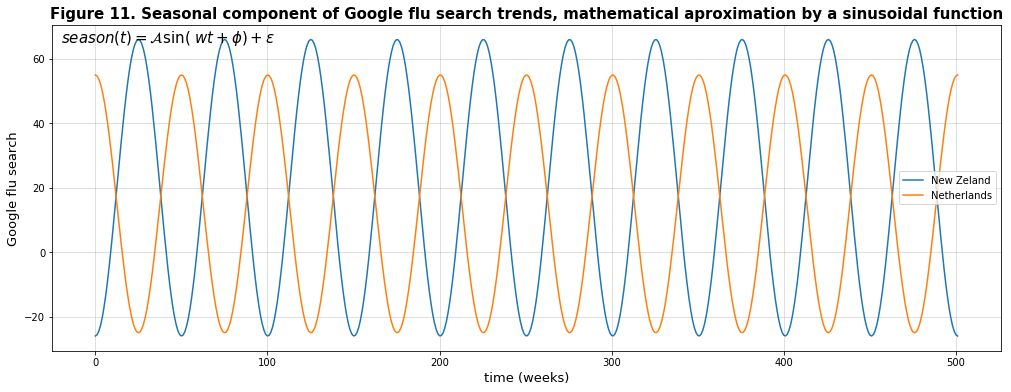

In [191]:
from matplotlib import pyplot as plt    
%matplotlib inline

# Aim to do an aproximation by a sine curve

N = 502 # number of data points to simulate
t = np.linspace(0, 20*np.pi, N) # multiply by 20 times the value of pi (remember 2*pi one wave,) to get 10 full waves. 
# The angular frequency (w = 2*pi*f) is considered in this part.

# New Zealand
amplitud_nz = 46
error_nz = 20
phase = (-np.pi/2) # phase shift where the wave starts, number must between 0 and 2pi
seasonal_aprox_nz = amplitud_nz * np.sin(t + phase) + error_nz

# Netherlands
amplitud_nl = 40
error_nl = 15
phase = np.pi/2
seasonal_aprox_nl = amplitud_nl * np.sin(t + phase) + error_nl

fig = plt.figure(figsize=(17,6)) 

# Plots - New Zealand and the Netherlands
plt.plot(seasonal_aprox_nz)
plt.plot(seasonal_aprox_nl)


# Set axes
ax.set_xlim(0,502)               
ax.set_ylim(-40,80)
plt.grid(b=None, which='major', axis='both', alpha=0.5) 
plt.legend(['New Zeland', 'Netherlands'])

# Labels:
plt.title('Figure 11. Seasonal component of Google flu search trends, mathematical aproximation by a sinusoidal function', fontsize=15, fontweight='bold')
plt.xlabel('time (weeks)', fontsize=13) 
plt.ylabel('Google flu search', fontsize=13)

# Write the mathematical expression in side the plot:
plt.text(-20,65, r'$season(t) =\mathcal{A}\mathrm{sin}(\ wt+\phi) + \epsilon$', fontsize=15)


plt.show()

## -----------------------------------------------------------------------------------------------------------

## GitHub

Completed Jupyter Notebook (WMRY4_CHMEGH37.ipynb) and HTML (WMRY4_CHMEGH37.html) files are available at: https://github.com/WMRY4/DMHR_2017

## References

Brownlee, J. 2017. How to Decompose Time Series Data into Trend and Seasonality. [ONLINE] Available at: https://machinelearningmastery.com/decompose-time-series-data-trend-seasonality/. [Accessed 8 March 2018]. <br>

Edlund, S., Kaufman, J., Lessler, J., Douglas, J., Bromberg, M., Kaufman, Z., Bassal, R., Chodick, G., Marom, R., Shalev, V. and Mesika, Y., 2011. Comparing three basic models for seasonal influenza. Epidemics, 3(3-4), pp.135-142. <br>

Mukaka, M.M., 2012. A guide to appropriate use of correlation coefficient in medical research. Malawi Medical Journal, 24(3), pp.69-71. <br>

Wikipedia. 2017. Decomposition of time series. [ONLINE] Available at: https://en.wikipedia.org/wiki/Decomposition_of_time_series. [Accessed 8 March 2018]. <br>


## Other sources consulted

Pandas: https://pandas.pydata.org/ <br>
    
Matplotlib: https://matplotlib.org/ <br>
    
NumPy: http://www.numpy.org/ <br>
    
Stack Overflow: https://stackoverflow.com/ <br>

WebMD: https://www.webmd.com/drugs/2/index <br>